In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import evaluation as eval
import simulation as sim
import reconstruction as reco
import offset_analysis as a

In [637]:
#input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/62dot5_yz_10_5/"
input_dir = "E:/MPhys Project Files/Z Rotation/output/"
n_runs = 16
n_offsets = 15

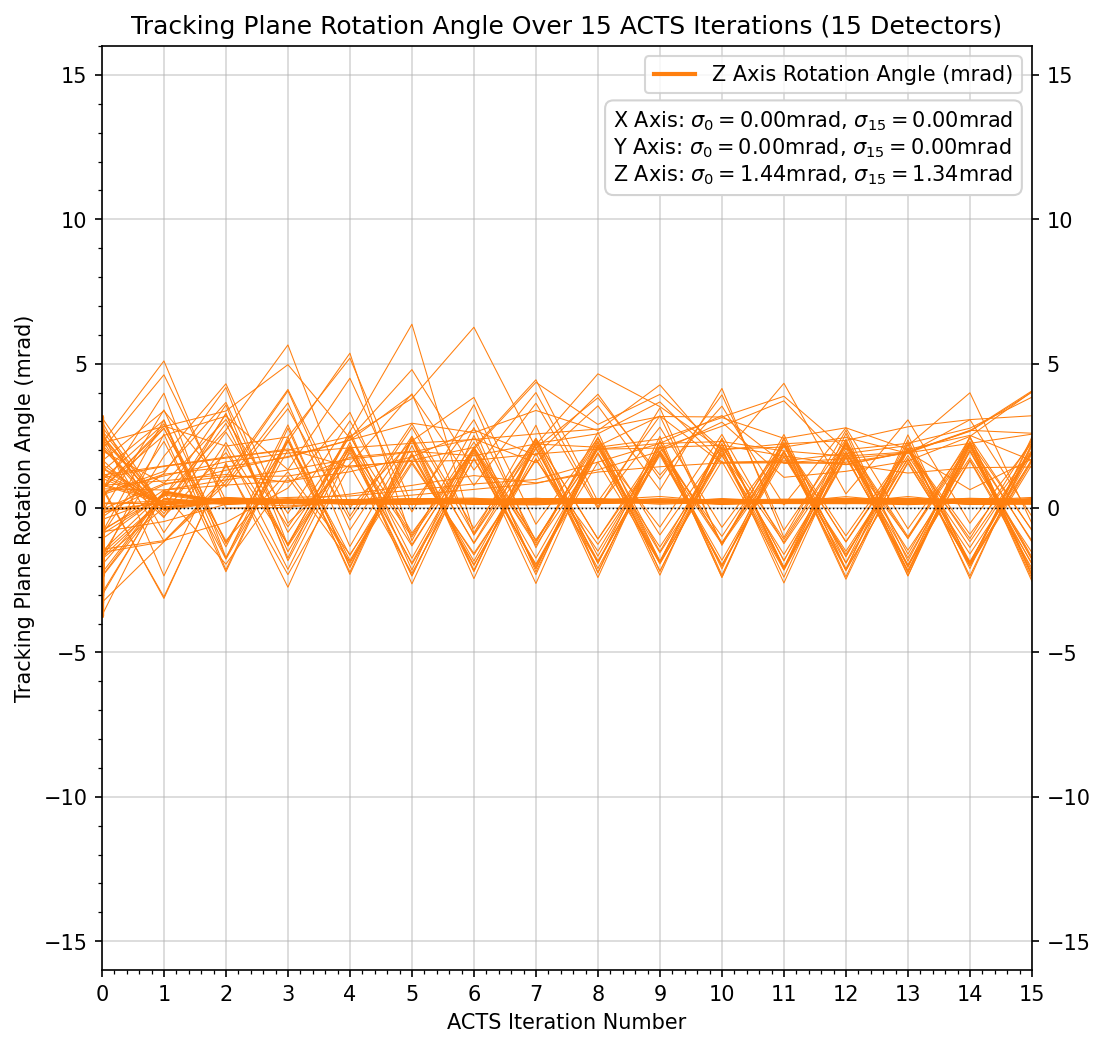

In [640]:
fig, ax = plt.subplots(figsize = (8,8), dpi = 150)

x = np.zeros((n_runs, n_offsets*5))
for i in range(n_runs):
    x[i] += i

x_rot = [np.loadtxt(input_dir + str(0) + "/rotations_x.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]
y_rot = [np.loadtxt(input_dir + str(0) + "/rotations_y.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]
z_rot = [np.loadtxt(input_dir + str(0) + "/rotations_z.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]

for i in range(1, n_runs):
    x_rot = np.concatenate((x_rot, [np.loadtxt(input_dir + str(i) + "/rotations_x.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]), axis = 0)
    y_rot = np.concatenate((y_rot, [np.loadtxt(input_dir + str(i) + "/rotations_y.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]), axis = 0)
    z_rot = np.concatenate((z_rot, [np.loadtxt(input_dir + str(i) + "/rotations_z.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]), axis = 0)

plt.xticks(np.arange(0,n_runs))
plt.yticks([-15, -10, -5, 0, 5, 10, 15])
plt.minorticks_on()
plt.ylim(-16, 16)
plt.xlim(0, n_runs-1)

plt.xlabel("ACTS Iteration Number")
plt.ylabel("Tracking Plane Rotation Angle (mrad)")
plt.title("Tracking Plane Rotation Angle Over " + str(n_runs-1) + " ACTS Iterations (" + str(n_offsets) + " Detectors)")
plt.tick_params(right = True, labelright = True)

#ax.plot(x[0], x_rot[0], lw = 2, alpha = 1, color="tab:red", label = "Y Offset")
#ax.plot(x[0], y_rot[0], lw = 2, alpha = 1, color="tab:blue", label = "Y Offset")
ax.plot(x[0], z_rot[0], lw = 2, alpha = 1, color="tab:orange", label = "Y Offset")

ax.legend(labels = ["Z Axis Rotation Angle (mrad)", "Y Axis Angle (mrad)", "Z Axis Angle (mrad)"])

#ax.plot(x, x_rot, lw = 0.5, alpha = 1, color="tab:red")
#ax.plot(x, y_rot, lw = 0.5, alpha = 1, color="tab:blue")
ax.plot(x, z_rot, lw = 0.5, alpha = 1, color="tab:orange")

plt.hlines(y = 0, xmin = 0, xmax = n_runs-1, linestyles = "dotted", colors = "black", lw = 0.7)
plt.grid(True, alpha = 0.5)

# Define the area to zoom in on
zoom_area = [3, 15, -0.05, 0.05]  # [xmin, xmax, ymin, ymax]

# Create inset figure
#ax_inset = ax.inset_axes([2.5, -13.5, 11.5, 11], transform=ax.transData)  # [left, bottom, width, height]
#
## Plot zoomed-in portion on the inset figure
#ax_inset.plot(x, x_rot, lw = 0.5, alpha = 1, color="tab:red")
#ax_inset.hlines(y = 0, xmin = 0, xmax = n_runs-1, linestyles = "dotted", colors = "black", lw = 0.7)
#ax_inset.set_xticks(np.arange(0, n_runs))
#ax_inset.set_yticks(np.arange(-0.04,0.05,0.01 ))
#ax_inset.tick_params(axis = "y", labelsize = 9)
#ax_inset.grid(True, alpha = 0.5)
#ax_inset.set_xlim(zoom_area[0], zoom_area[1])
#ax_inset.set_ylim(zoom_area[2], zoom_area[3])
#ax.indicate_inset_zoom(ax_inset, alpha = 0.5, edgecolor ="black")
plt.text(0.55, 0.89, "X Axis: $\sigma_0 = 0.00$mrad, $\sigma_{15} = 0.00$mrad\nY Axis: $\sigma_0 = 0.00$mrad, $\sigma_{15} = 0.00$mrad\nZ Axis: $\sigma_0 = 1.44$mrad, $\sigma_{15} = 1.34$mrad", horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', boxstyle='round,pad=0.4', alpha=1, ec="lightgray"))
#plt.savefig("x_rot_misalignment.jpg")

plt.show()

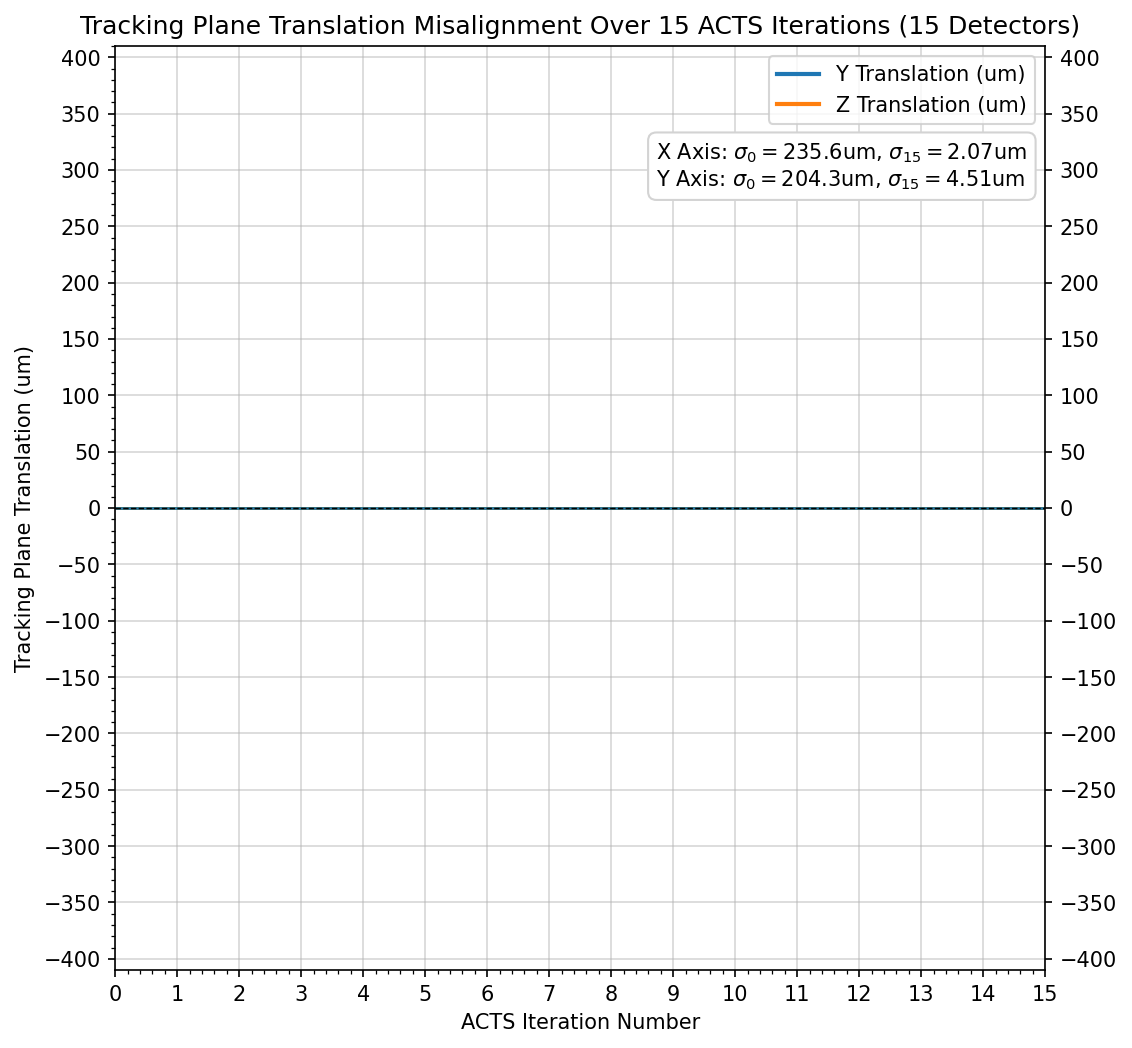

In [641]:
plt.figure(figsize = (8,8), dpi = 150)

x = np.zeros((n_runs, n_offsets*5))
for i in range(n_runs):
    x[i] += i

x_t = [np.loadtxt(input_dir + str(0) + "/offsets_x.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]
y = [np.loadtxt(input_dir + str(0) + "/offsets_y.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]
z = [np.loadtxt(input_dir + str(0) + "/offsets_z.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]
for i in range(1, n_runs):
    x_t = np.concatenate((x_t, [np.loadtxt(input_dir + str(i) + "/offsets_x.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]), axis = 0)
    y = np.concatenate((y, [np.loadtxt(input_dir + str(i) + "/offsets_y.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]), axis = 0)
    z = np.concatenate((z, [np.loadtxt(input_dir + str(i) + "/offsets_z.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]), axis = 0)

plt.xticks(np.arange(0,n_runs))
plt.yticks([-400, -350, -300, -250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 300, 350, 400])
plt.minorticks_on()
plt.ylim(-410, 410)
plt.xlim(0, n_runs-1)

plt.xlabel("ACTS Iteration Number")
plt.ylabel("Tracking Plane Translation (um)")
plt.title("Tracking Plane Translation Misalignment Over " + str(n_runs-1) + " ACTS Iterations ("+ str(n_offsets) + " Detectors)")
plt.tick_params(right = True, labelright = True)

#plt.plot(x[0], x_t[0], lw = 0.5, alpha = 1, color="tab:blue", label = "Y Offset")
plt.plot(x[0], y[0], lw = 2, alpha = 1, color="tab:blue", label = "Y Offset")
plt.plot(x[0], z[0], lw = 2, alpha = 1, color="tab:orange", label = "Z Offset")

plt.legend(labels = ["Y Translation (um)", "Z Translation (um)"])

#plt.plot(x, x_t, lw = 0.5, alpha = 1, color="tab:red")
plt.plot(x, z, lw = 0.5, alpha = 1, color="tab:orange")
plt.plot(x, y, lw = 0.5, alpha = 1, color="tab:blue")

plt.hlines(y = 0, xmin = 0, xmax = n_runs-1, linestyles = "dashed", colors = "black", lw = 0.7)
plt.grid(True, alpha = 0.5)
plt.text(0.582, 0.87, "Y Axis: $\sigma_0 = 204.3$um, $\sigma_{15} = 4.51$um\nZ Axis: $\sigma_0 = 235.6$um, $\sigma_{15} = 2.07$um", horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', boxstyle='round,pad=0.4', alpha=1, ec="lightgray"))
#plt.savefig("xy_trans_misalignment.jpg")

plt.show()

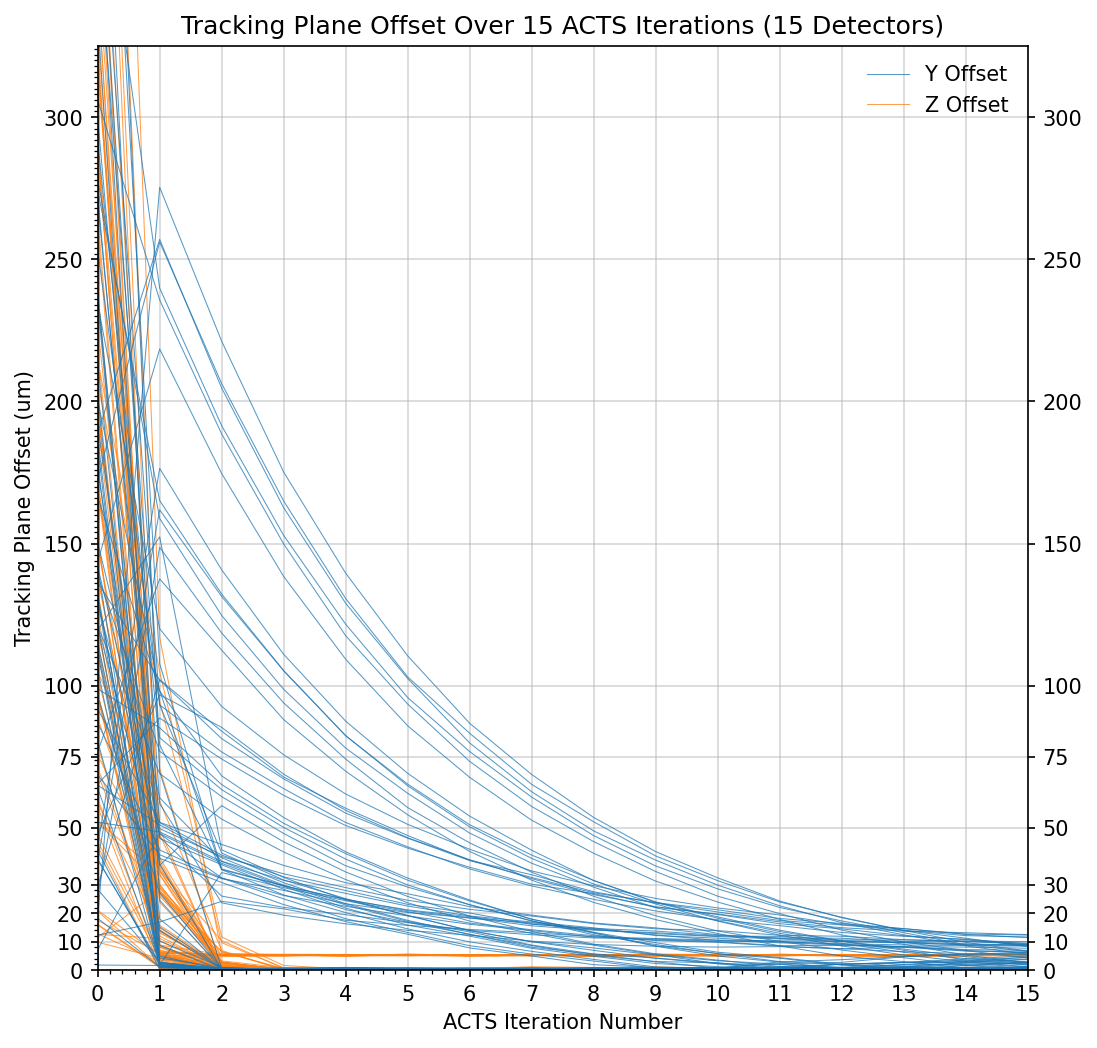

In [158]:
plt.figure(figsize = (8,8), dpi = 150)

x = np.zeros((n_runs, n_offsets*5))
for i in range(n_runs):
    x[i] += i

y = [np.loadtxt(input_dir + str(0) + "/offsets_y.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]
z = [np.loadtxt(input_dir + str(0) + "/offsets_z.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]
for i in range(1, n_runs):
    y = np.concatenate((y, [np.loadtxt(input_dir + str(i) + "/offsets_y.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]), axis = 0)
    z = np.concatenate((z, [np.loadtxt(input_dir + str(i) + "/offsets_z.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]), axis = 0)

plt.xticks(np.arange(0,n_runs))
plt.yticks([0, 10, 20, 30, 50, 75, 100, 150, 200, 250, 300])
plt.minorticks_on()
plt.ylim(0, 325)
plt.xlim(0, n_runs-1)

plt.xlabel("ACTS Iteration Number")
plt.ylabel("Tracking Plane Offset (um)")
plt.title("Tracking Plane Offset Over " + str(n_runs-1) + " ACTS Iterations ("+ str(n_offsets) + " Detectors)")
plt.tick_params(right = True, labelright = True)

plt.plot(x[0], np.abs(y[0]), lw = 0.5, alpha = 0.75, color="tab:blue", label = "Y Offset")
plt.plot(x[0], np.abs(z[0]), lw = 0.5, alpha = 0.75, color="tab:orange", label = "Z Offset")

plt.legend(labels = ["Y Offset", "Z Offset"], frameon=False)

plt.plot(x, np.abs(z), lw = 0.5, alpha = 0.75, color="tab:orange")
plt.plot(x, np.abs(y), lw = 0.5, alpha = 0.75, color="tab:blue")

plt.hlines(y = 0, xmin = 0, xmax = n_runs-1, linestyles = "dotted", colors = "black", lw = 0.7)
plt.grid(True, alpha = 0.5)

plt.show()

In [61]:
y = y[:,10:]
z = z[:,10:]

x_rot = x_rot[:,10:]

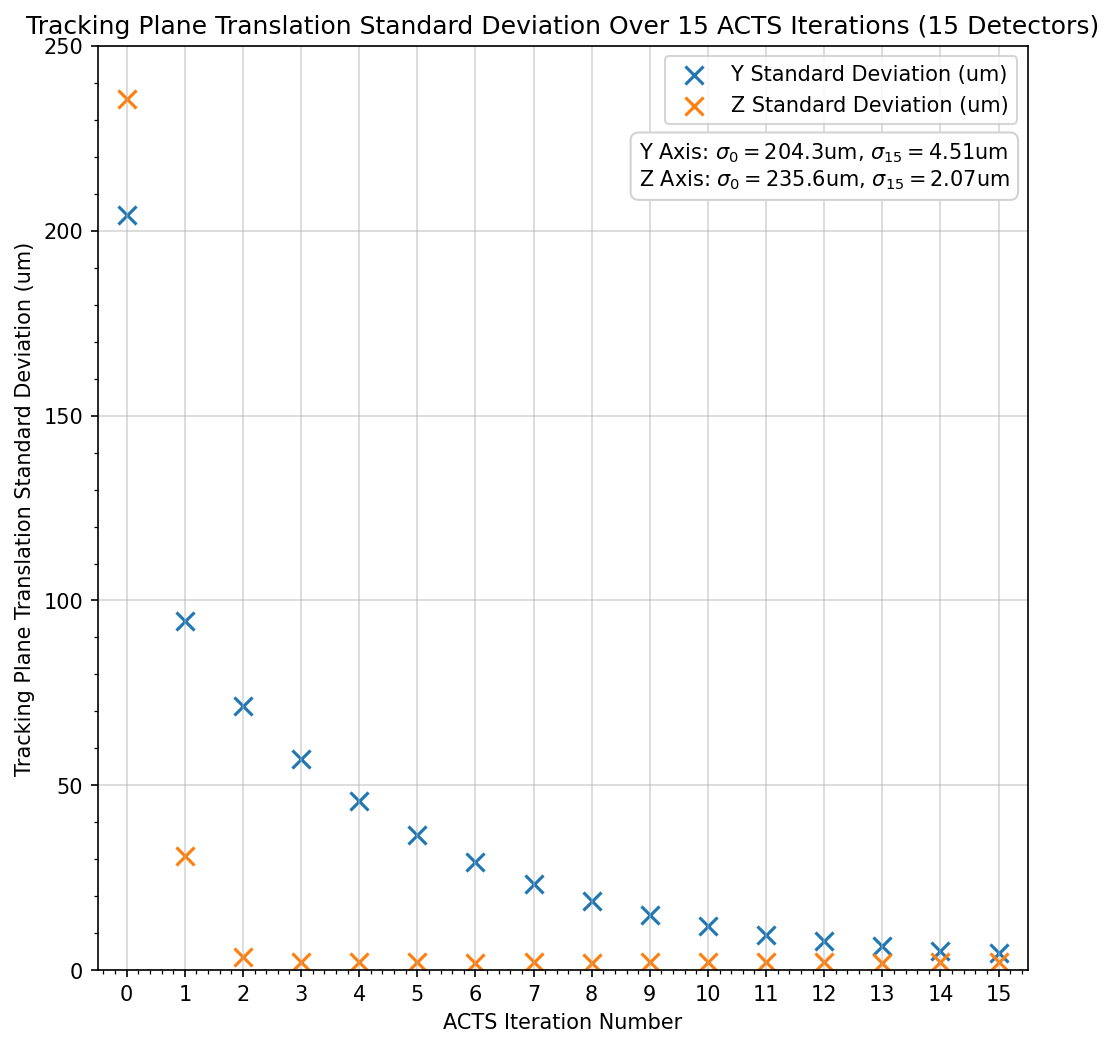

In [626]:
plt.figure(figsize = (8,8), dpi = 150)

x = np.arange(0, n_runs)

std_y = np.std(y, axis = 1)
std_z = np.std(z, axis = 1)

plt.ylim(0, 250)
plt.xlim(-0.5, n_runs-0.5)
plt.xticks(np.arange(0,n_runs))
plt.minorticks_on()

plt.xlabel("ACTS Iteration Number")
plt.ylabel("Tracking Plane Translation Standard Deviation (um)")
plt.title("Tracking Plane Translation Standard Deviation Over " + str(n_runs-1) + " ACTS Iterations ("+ str(n_offsets) + " Detectors)")

plt.scatter(x, std_y, lw = 1.5, color="tab:blue", s = 75, marker = "x")
plt.scatter(x, std_z, lw = 1.5, color="tab:orange", s = 75, marker = "x")

plt.legend(labels = ["Y Standard Deviation (um)", "Z Standard Deviation (um)"])
plt.grid(True, alpha = 0.5)
plt.text(0.582, 0.87, "Y Axis: $\sigma_0 = 204.3$um, $\sigma_{15} = 4.51$um\nZ Axis: $\sigma_0 = 235.6$um, $\sigma_{15} = 2.07$um", horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', boxstyle='round,pad=0.4', alpha=1, ec="lightgray"))

plt.savefig("yz_trans_std.jpg")

plt.show()

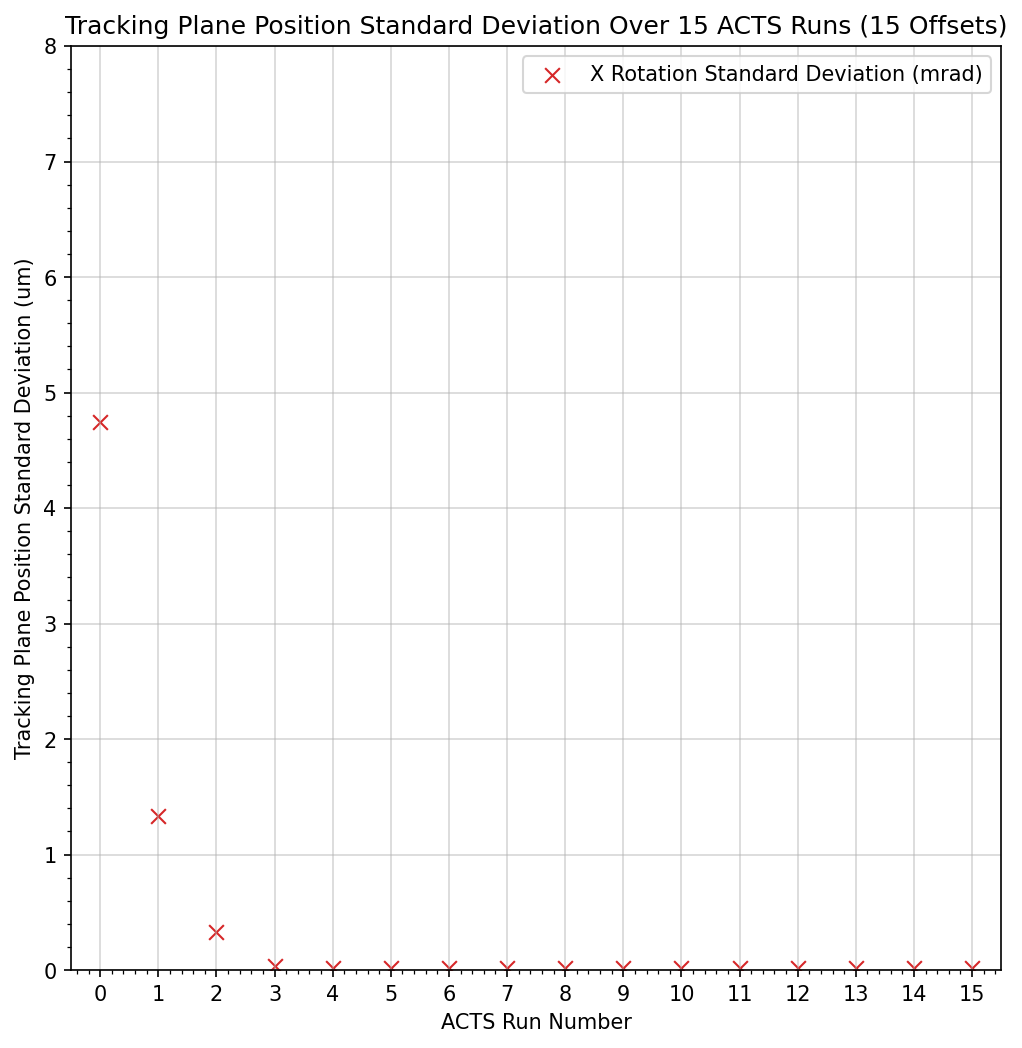

In [182]:
plt.figure(figsize = (8,8), dpi = 150)

x = np.arange(0, n_runs)

std_xrot = np.std(x_rot, axis = 1)

plt.ylim(0, 8)
plt.xlim(-0.5, n_runs-0.5)
plt.xticks(np.arange(0,n_runs))
plt.minorticks_on()

plt.xlabel("ACTS Run Number")
plt.ylabel("Tracking Plane Rotation Standard Deviation (mrad)")
plt.title("Tracking Plane Rotation Standard Deviation Over " + str(n_runs-1) + " ACTS Runs ("+ str(n_offsets) + " Offsets)")

plt.scatter(x, std_xrot, lw = 1, color="tab:red", s = 50, marker = "x")

plt.legend(labels = ["X Rotation Standard Deviation (mrad)"])
plt.grid(True, alpha = 0.5)
plt.savefig("x_rot_std.jpg")
plt.show()

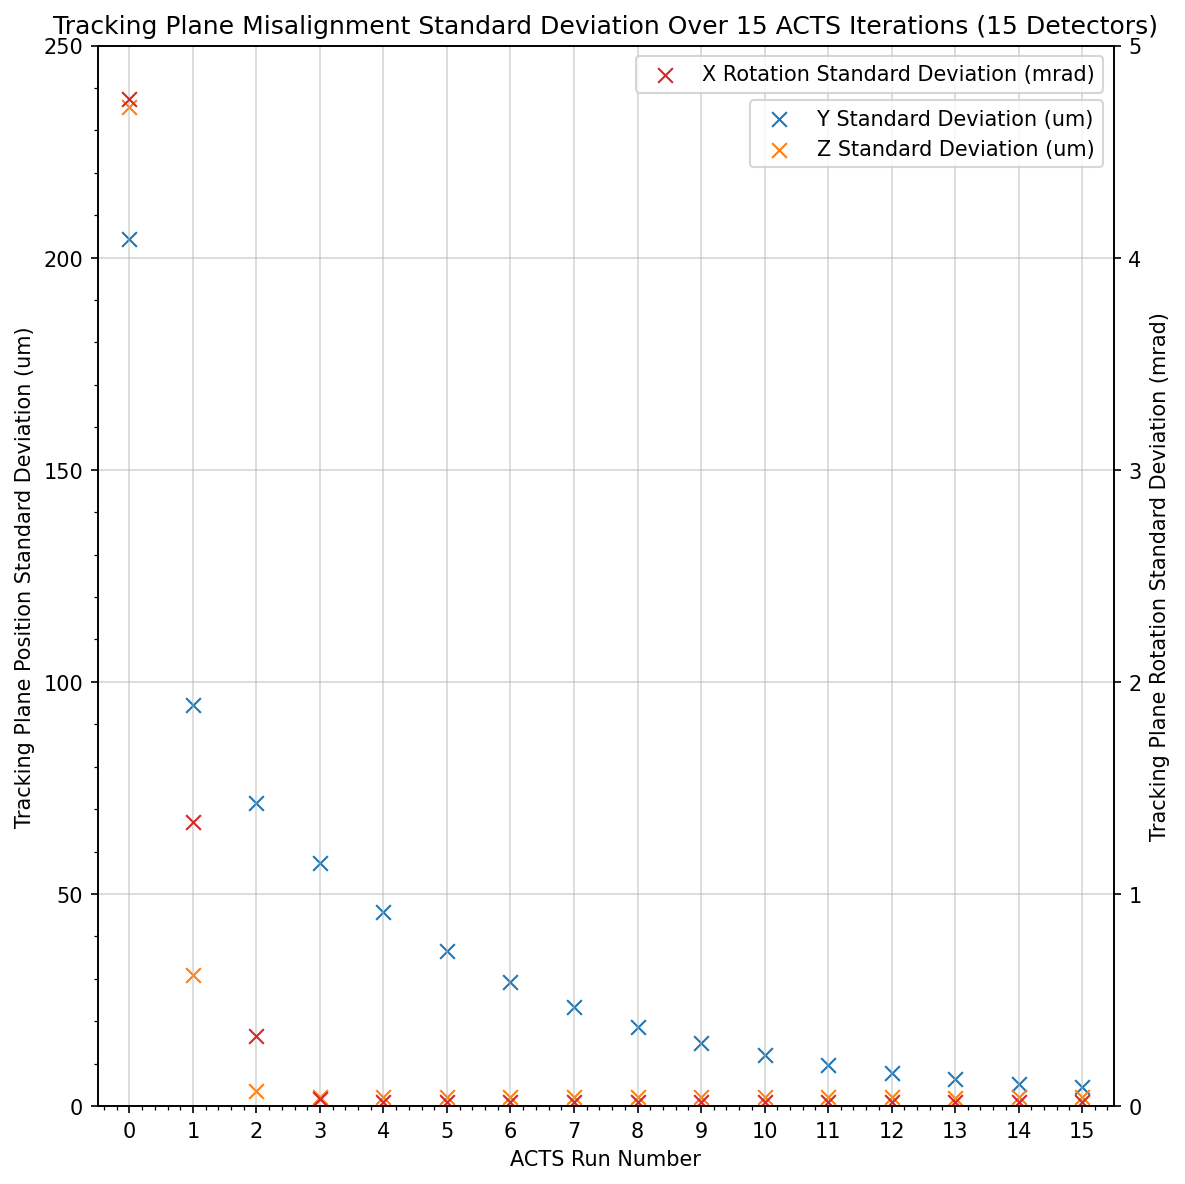

In [216]:
# Create some mock data
fig, ax1 = plt.subplots(figsize = (8,8), dpi = 150)

x = np.arange(0, n_runs)

plt.xlim(-0.5, n_runs-0.5)
plt.xticks(np.arange(0,n_runs))
plt.minorticks_on()
plt.grid(True, alpha = 0.5)
plt.title("Tracking Plane Misalignment Standard Deviation Over " + str(n_runs-1) + " ACTS Iterations ("+ str(n_offsets) + " Detectors)")

ax1.set_xlabel("ACTS Run Number")
ax1.set_ylabel("Tracking Plane Position Standard Deviation (um)")
ax1.scatter(x, std_y, lw = 1, color="tab:blue", s = 50, marker = "x")
ax1.scatter(x, std_z, lw = 1, color="tab:orange", s = 50, marker = "x")
ax1.set_ylim(0, 250)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("Tracking Plane Rotation Standard Deviation (mrad)")  # we already handled the x-label with ax1
ax2.scatter(x, std_xrot, lw = 1, color="tab:red", s = 50, marker = "x")
ax2.set_ylim(0, 5)

ax1.legend(labels = ["Y Standard Deviation (um)", "Z Standard Deviation (um)"], loc = (0.642,0.885))
ax2.legend(labels = ["X Rotation Standard Deviation (mrad)"], loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("xyz_std.jpg")
plt.show()

In [794]:
mean_xrot = np.mean(x_rot, axis = 1)
mean_yrot = np.mean(y_rot, axis = 1)
mean_zrot = np.mean(z_rot, axis = 1)

mean_y = np.mean(y, axis = 1)
mean_z = np.mean(z, axis = 1)

print(mean_xrot)
print(mean_yrot)
print(mean_zrot)

print(mean_y)
print(mean_z)

[ 1.40535162 -0.08109713  0.02671242  0.04271784  0.04312859  0.04314103
  0.04326191  0.0430201   0.04308572  0.04315987  0.04315889  0.04310151
  0.04314344  0.04317084  0.04313994  0.04301071]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 36.21526375 -25.669341   -23.17799831 -17.8759769  -13.47157788
 -10.02193316  -7.25731161  -5.00769614  -3.23748121  -1.75926791
  -0.66550593   0.26481467   1.03063094   1.5791721    2.02539799
   2.42322856]
[ 8.8354632  -0.86918989 -1.10099162 -1.08732381 -1.15766752 -1.18664592
 -1.1708384  -1.14214123 -1.1313487  -1.14526681 -1.14164157 -1.1611165
 -1.16113745 -1.14033016 -1.14971396 -1.13054831]


In [795]:
np.mean(np.sqrt(aligned_df["LOCAL_Y_HIT_1"]**2 + aligned_df["LOCAL_Y_HIT_2"]**2))*0.043

47.86693851574311

In [620]:
std_xrot = np.std(x_rot, axis = 1)
std_yrot = np.std(y_rot, axis = 1)
std_zrot = np.std(z_rot, axis = 1)
std_y = np.std(y, axis = 1)
std_z = np.std(z, axis = 1)

print(std_xrot)
print(std_yrot)
print(std_zrot)
print(std_y)
print(std_z)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[204.28140802  94.43453194  71.48688598  57.18734576  45.66525394
  36.52706054  29.17105753  23.28957981  18.58257152  14.79247989
  11.94770794   9.59348958   7.77582997   6.42380437   5.27231846
   4.51240442]
[235.60813865  30.78308132   3.45184551   2.10645278   2.06648118
   2.0672308    2.04524746   2.07896375   2.04840188   2.08375644
   2.05731307   2.07144365   2.06882467   2.01517846   2.06185273
   2.07228982]


In [607]:
std_xrot = np.std(x_rot, axis = 1)
std_yrot = np.std(y_rot, axis = 1)
std_zrot = np.std(z_rot, axis = 1)
std_y = np.std(y, axis = 1)
std_z = np.std(z, axis = 1)

print(std_xrot)
print(std_yrot)
print(std_zrot)
print(std_y)
print(std_z)

[4.45660256 1.44368127 0.38958874 0.03498427 0.01817191 0.01724375
 0.01715189 0.01716551 0.01719143 0.01717695 0.01718684 0.01717609
 0.01715157 0.01716675 0.01719331 0.01719704]
[4.99682598 4.99682598 4.99682598 4.99682598 4.99682598 4.99682598
 4.99682598 4.99682598 4.99682598 4.99682598 4.99682598 4.99682598
 4.99682598 4.99682598 4.99682598 4.99682598]
[1.64368646 1.64368646 1.64368646 1.64368646 1.64368646 1.64368646
 1.64368646 1.64368646 1.64368646 1.64368646 1.64368646 1.64368646
 1.64368646 1.64368646 1.64368646 1.64368646]
[239.66004551 137.95707402  77.48047681  59.52921501  47.66053195
  38.25544121  30.7315994   24.98827508  20.17921651  16.39126931
  13.36774272  11.05154969   9.22775105   7.89368654   6.86214435
   6.08830766]
[256.80817219  55.68161482  12.48761097   4.9332024    1.38142706
   1.15086829   1.62405525   1.31102666   1.52347102   1.14139355
   1.16186977   1.1328815    1.16700488   1.10670619   1.15079255
   1.15141961]


In [773]:
input_dir_run = input_dir + str(0) + "/"

n_inputs = 13

offsets_x = np.loadtxt(input_dir_run +  "offsets_x.csv", delimiter = ",")[:,1:7]
offsets_y = np.loadtxt(input_dir_run +  "offsets_y.csv", delimiter = ",")[:,1:7]
offsets_z = np.loadtxt(input_dir_run +  "offsets_z.csv", delimiter = ",")[:,1:7]

rotations_x = np.loadtxt(input_dir_run +  "rotations_x.csv", delimiter = ",")[:,1:7]
rotations_y = np.loadtxt(input_dir_run +  "rotations_y.csv", delimiter = ",")[:,1:7]
rotations_z = np.loadtxt(input_dir_run +  "rotations_z.csv", delimiter = ",")[:,1:7]

truth_parameters = np.array(np.array([rotations_x[0:n_offsets], rotations_y[0:n_offsets], rotations_z[0:n_offsets], offsets_x[0:n_offsets], offsets_y[0:n_offsets], offsets_z[0:n_offsets]])).transpose((1,2,0))

In [774]:
parameters, sum_of_residuals_squared, sum_of_no_squared, df, df_offsets = eval.Analyse_Multiple_Runs(input_dir_run, n_offsets, n_inputs,
                                                                              offsets_x = offsets_x, offsets_y = offsets_y, offsets_z = offsets_z, 
                                                                              rotations_x = rotations_x, rotations_y = rotations_y, rotations_z = rotations_z,
                                                                              initial_guess = np.random.uniform(-0.05, 0.05, 6),
                                                                              bounds = [(0, 0),(0, 0),(0, 0),(0, 0),(0, 0),(0, 0)],
                                                                              reprop=False)


ANALYSING DATAFRAME: 0

Truth transformation parameters:  [ 4.26786721e-05  1.24811539e-03 -2.68070039e-03  1.70297262e-01
  2.68753390e-03  5.44181495e-04]
Optimal transformation parameters: [0. 0. 0. 0. 0. 0.]
Sum of squares of residuals: 1194.1015001600983
Sum of squares of residuals (no transform): 1194.1015001600983


Optimal transformation parameters: [0. 0. 0. 0. 0. 0.]
Sum of squares of residuals: 1194.1015001600983
Sum of squares of residuals (no transform): 1194.1015001600983


Truth transformation parameters:  [ 6.73439387e-07  5.83453727e-03 -3.97930389e-04 -7.56329366e-03
  7.55533297e-04  1.33470535e-03]
Optimal transformation parameters: [0. 0. 0. 0. 0. 0.]
Sum of squares of residuals: 585.5841169977155
Sum of squares of residuals (no transform): 585.5841169977155


Optimal transformation parameters: [0. 0. 0. 0. 0. 0.]
Sum of squares of residuals: 585.5841169977155
Sum of squares of residuals (no transform): 585.5841169977155


Truth transformation parameters:  [-6.637

c:\Users\luke\OneDrive\Documents\MPhys Project\FASER-2-MPhys-Project\Analysis\evaluation.py:96: RuntimeWarning: invalid value encountered in scalar divide
  if sum_of_residuals_squared_31/sum_of_no_squared_31 < sum_of_residuals_squared/sum_of_no_squared:


Truth transformation parameters:  [ 1.47264319e-07  6.63254718e-04  2.32242672e-03 -2.18336250e-01
  1.86134958e-03  2.72779881e-05]
FULL DATA
Optimal transformation parameters: [0. 0. 0. 0. 0. 0.]
Sum of squares of residuals: 8367.829591588783
Sum of squares of residuals (no transform): 8367.829591588783


Optimal transformation parameters: [0. 0. 0. 0. 0. 0.]
Sum of squares of residuals: 8367.829591588783
Sum of squares of residuals (no transform): 8367.829591588783


HIGH P, LOW CHI2
Optimal transformation parameters: [0. 0. 0. 0. 0. 0.]
Sum of squares of residuals: 0.0
Sum of squares of residuals (no transform): 0.0


Optimal transformation parameters: [0. 0. 0. 0. 0. 0.]
Sum of squares of residuals: 0.0
Sum of squares of residuals (no transform): 0.0


Truth transformation parameters:  [ 7.50032947e-07 -4.19155810e-03 -1.25487874e-03 -6.21879275e-02
  1.04342828e-02 -1.55671048e-03]
FULL DATA
Optimal transformation parameters: [0. 0. 0. 0. 0. 0.]
Sum of squares of residuals: 9270.

In [30]:
p_m_res = []
p_s_res = []
binned_p_res = []
binned_p_m_res = []
bins = [0, 500, 1000, 1500, 2000, 2500, 3000]

for i in range(0, n_runs-1):

    df_i = pd.read_csv(input_dir + str(i) + "/df" + str(0) + ".csv")

    for j in range(1, n_offsets):

        df_i = pd.concat([df_i, pd.read_csv(input_dir + str(i) + "/df" + str(j) + ".csv")], ignore_index = True)

        df_i = df_i[df_i["P_TRUTH"] < 3000]
        
    for k in range(1, len(bins)):
        
        binned_p_res.append(np.std((np.abs((((df_i["P_FIT"] - df_i["P_TRUTH"])/df_i["P_TRUTH"])[(df_i["P_TRUTH"] > bins[k-1]) & (df_i["P_TRUTH"] < bins[k])])))*100))
        binned_p_m_res.append(np.mean((np.abs((((df_i["P_FIT"] - df_i["P_TRUTH"])/df_i["P_TRUTH"])[(df_i["P_TRUTH"] > bins[k-1]) & (df_i["P_TRUTH"] < bins[k])])))*100))

    p_m_res.append(np.mean(np.abs((df_i["P_FIT"] - df_i["P_TRUTH"])/df_i["P_TRUTH"])*100))

    p_s_res.append(np.std(np.abs((df_i["P_FIT"] - df_i["P_TRUTH"])/df_i["P_TRUTH"])*100))

In [32]:
aligned_df = pd.read_csv("E:/MPhys Project Files/Aligned Detector/output/0/df0.csv")

al_bins = np.arange(0, 3500, step = 500)

al_p_s_res = []
al_p_m_res = []
al_binned_p_res = []

df_i = aligned_df
df_i = df_i[df_i["P_TRUTH"] < 3000]
for k in range(1, len(al_bins)):
    
    al_binned_p_res.append(np.std((np.abs((((df_i["P_FIT"] - df_i["P_TRUTH"])/df_i["P_TRUTH"])[(df_i["P_TRUTH"] > al_bins[k-1]) & (df_i["P_TRUTH"] < al_bins[k])])))*100))

al_p_s_res.append(np.std(np.abs((df_i["P_FIT"] - df_i["P_TRUTH"])/df_i["P_TRUTH"])*100))
al_p_m_res.append(np.mean(np.abs((df_i["P_FIT"] - df_i["P_TRUTH"])/df_i["P_TRUTH"])*100))

In [33]:
al_p_s_res

[1.2311414364936804]

In [31]:
p_s_res

[34.1272802750385,
 5.4856013335834595,
 2.00889209028557,
 1.4207155020352138,
 1.350833165540256,
 1.3071493927714404,
 1.279875319582806,
 1.261841013628148,
 1.250261868484674,
 1.2428221804843793,
 1.2381456234599413,
 1.2352420363098853,
 1.2334451265634778,
 1.2323266627867193,
 1.2315867550326678]

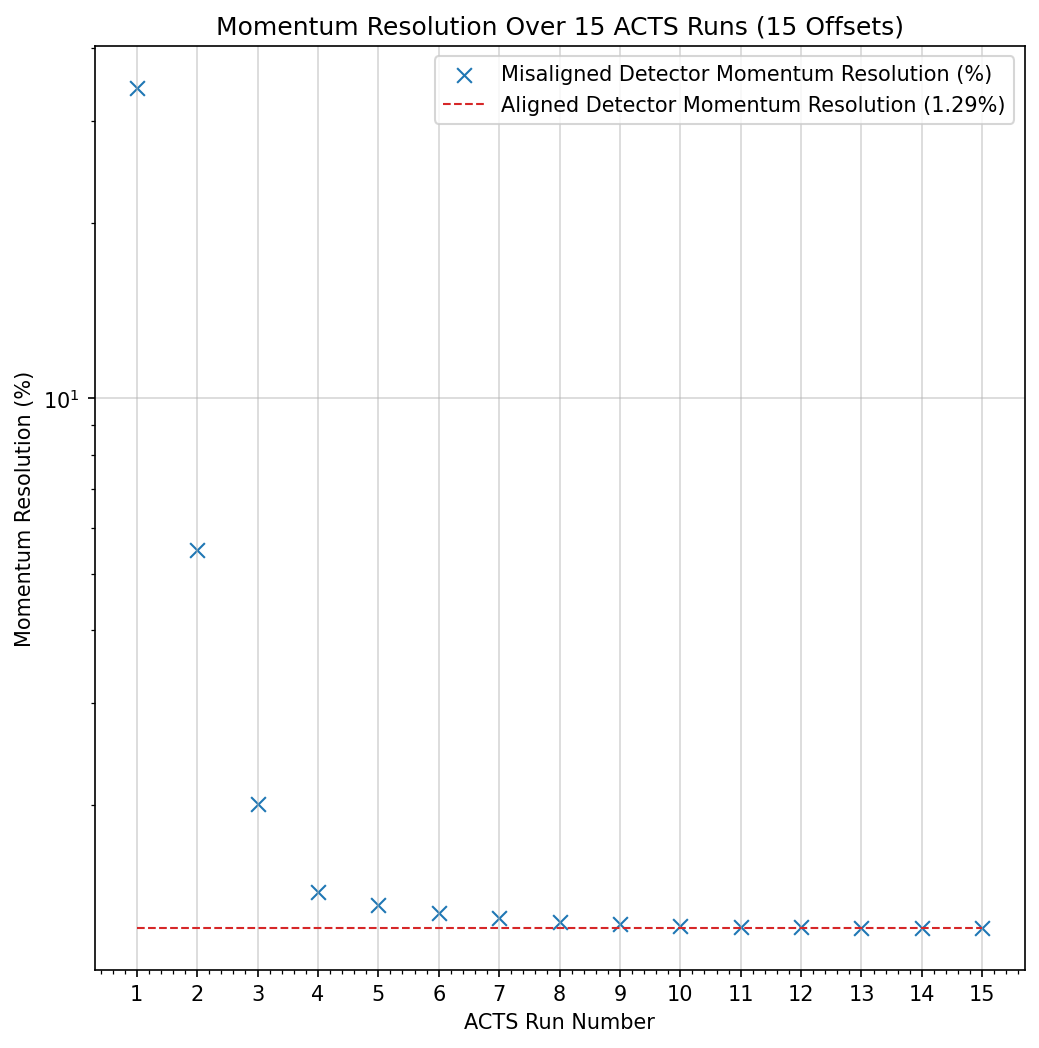

In [34]:
plt.figure(figsize=(8,8), dpi=150)
plt.scatter(np.arange(1, n_runs), p_s_res, lw = 1, color="tab:blue", s = 50, marker = "x")
plt.hlines(y = al_p_s_res, xmin = 1, xmax = n_runs-1, linestyles = "dashed", colors = "tab:red", lw = 1)
plt.xticks(np.arange(1,n_runs))
plt.minorticks_on()
plt.xlabel("ACTS Run Number")
plt.ylabel("Momentum Resolution (%)")
plt.title("Momentum Resolution Over " + str(n_runs-1) + " ACTS Runs ("+ str(n_offsets) + " Offsets)")
plt.grid(True, alpha = 0.5)
plt.legend(["Misaligned Detector Momentum Resolution (%)", "Aligned Detector Momentum Resolution (1.29%)"])
plt.yscale("log")
plt.savefig("p_res.jpg")

plt.show()

In [35]:
p_s_res

[34.1272802750385,
 5.4856013335834595,
 2.00889209028557,
 1.4207155020352138,
 1.350833165540256,
 1.3071493927714404,
 1.279875319582806,
 1.261841013628148,
 1.250261868484674,
 1.2428221804843793,
 1.2381456234599413,
 1.2352420363098853,
 1.2334451265634778,
 1.2323266627867193,
 1.2315867550326678]

In [36]:
al_p_s_res

[1.2311414364936804]

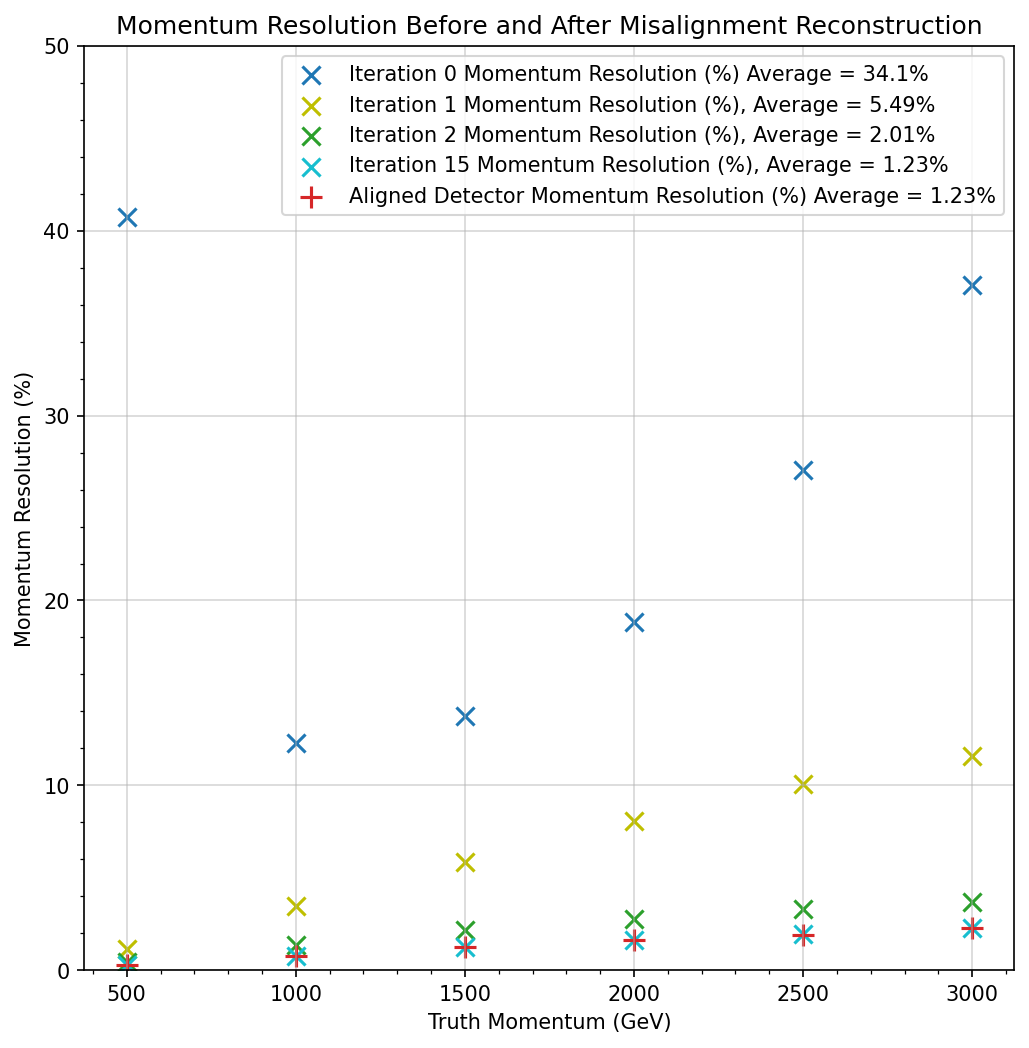

In [38]:
import matplotlib.ticker

fig, ax1 = plt.subplots(figsize=(8,8), dpi=150)

ax1.scatter(bins[1:], binned_p_res[0:6], lw = 1.5, color="tab:blue", s = 75, marker = "x")
ax1.scatter(bins[1:], binned_p_res[6:12], lw = 1.5, color="y", s = 75, marker = "x")
ax1.scatter(bins[1:], binned_p_res[12:18], lw = 1.5, color="tab:green", s = 75, marker = "x")
ax1.scatter(bins[1:], binned_p_res[-6:], lw = 1.5, color="tab:cyan", s = 75, marker = "x")
ax1.scatter(al_bins[1:], al_binned_p_res, lw = 1.5, color="tab:red", s = 120, marker="+")

ax1.legend(["Iteration 0 Momentum Resolution (%) Average = 34.1%", "Iteration 1 Momentum Resolution (%), Average = 5.49%", "Iteration 2 Momentum Resolution (%), Average = 2.01%", "Iteration 15 Momentum Resolution (%), Average = 1.23%", "Aligned Detector Momentum Resolution (%) Average = 1.23%"])
plt.minorticks_on()
plt.xlabel("Truth Momentum (GeV)")
plt.ylabel("Momentum Resolution (%)")
plt.title("Momentum Resolution Before and After Misalignment Reconstruction")
plt.grid(True, alpha = 0.5)

ax1.set_ylim(0, 50)

plt.savefig("compare_p_res.jpg")
plt.show()

In [854]:
outlier_y

2072.337929710672

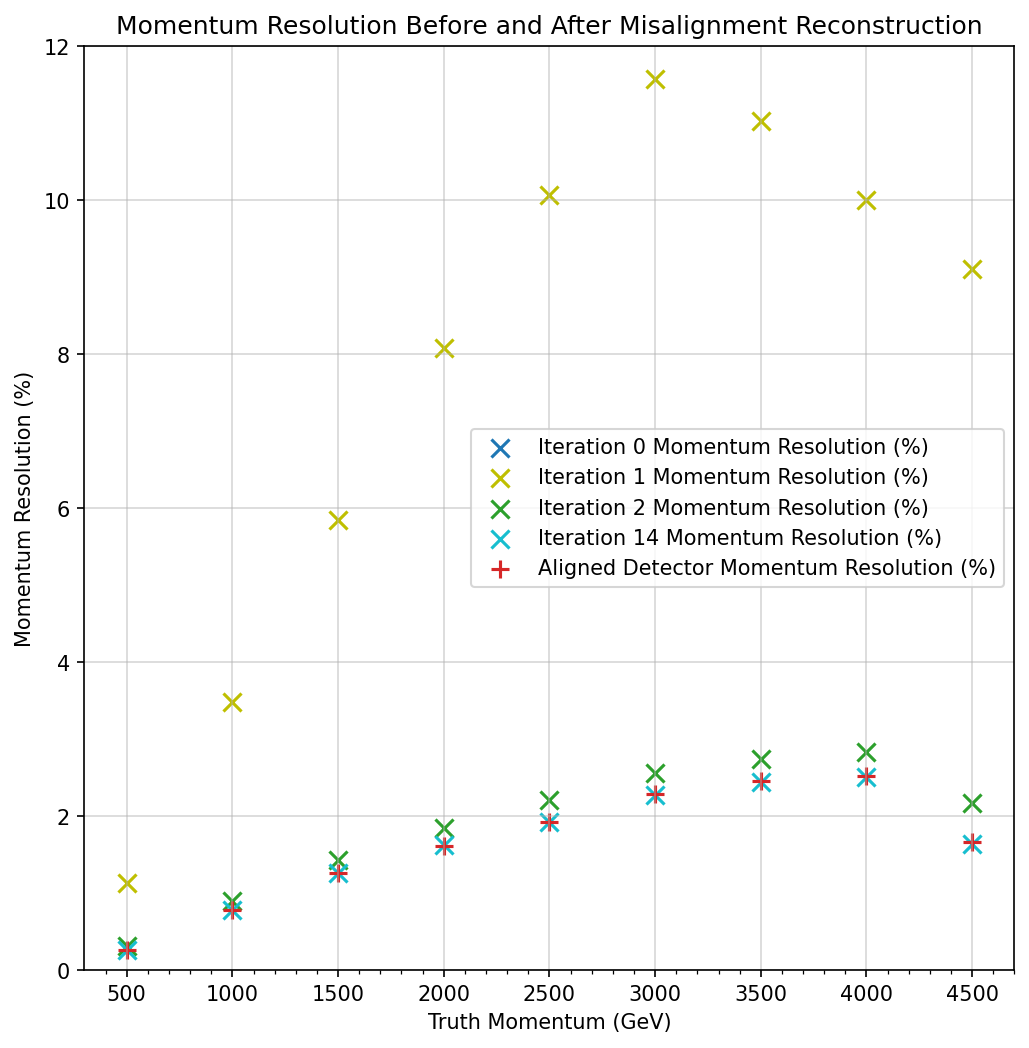

In [480]:
import matplotlib.ticker

plt.figure(figsize=(8,8), dpi=150)

plt.scatter(bins[1:], binned_p_res[0:10], lw = 1.5, color="tab:blue", s = 75, marker = "x")
plt.scatter(bins[1:], binned_p_res[10:20], lw = 1.5, color="y", s = 75, marker = "x")
plt.scatter(bins[1:], binned_p_res[30:40], lw = 1.5, color="tab:green", s = 75, marker = "x")
plt.scatter(bins[1:], binned_p_res[-10:], lw = 1.5, color="tab:cyan", s = 75, marker = "x")
plt.scatter(al_bins[1:], al_binned_p_res, lw = 1.5, color="tab:red", s = 75, marker="+")

plt.legend(["Iteration 0 Momentum Resolution (%)", "Iteration 1 Momentum Resolution (%)", "Iteration 2 Momentum Resolution (%)", "Iteration 14 Momentum Resolution (%)", "Aligned Detector Momentum Resolution (%)"])
plt.minorticks_on()
plt.xlabel("Truth Momentum (GeV)")
plt.ylabel("Momentum Resolution (%)")
plt.title("Momentum Resolution Before and After Misalignment Reconstruction")
plt.ylim(0, 12)
plt.grid(True, alpha = 0.5)
plt.yticks([1, 2, 3, 5, 10])
plt.savefig("compare_p_res.jpg")
plt.yscale("linear")
plt.show()

In [250]:
np.mean(np.abs(aligned_df["LOCAL_Y_HIT_1"]))

786.9487149609996

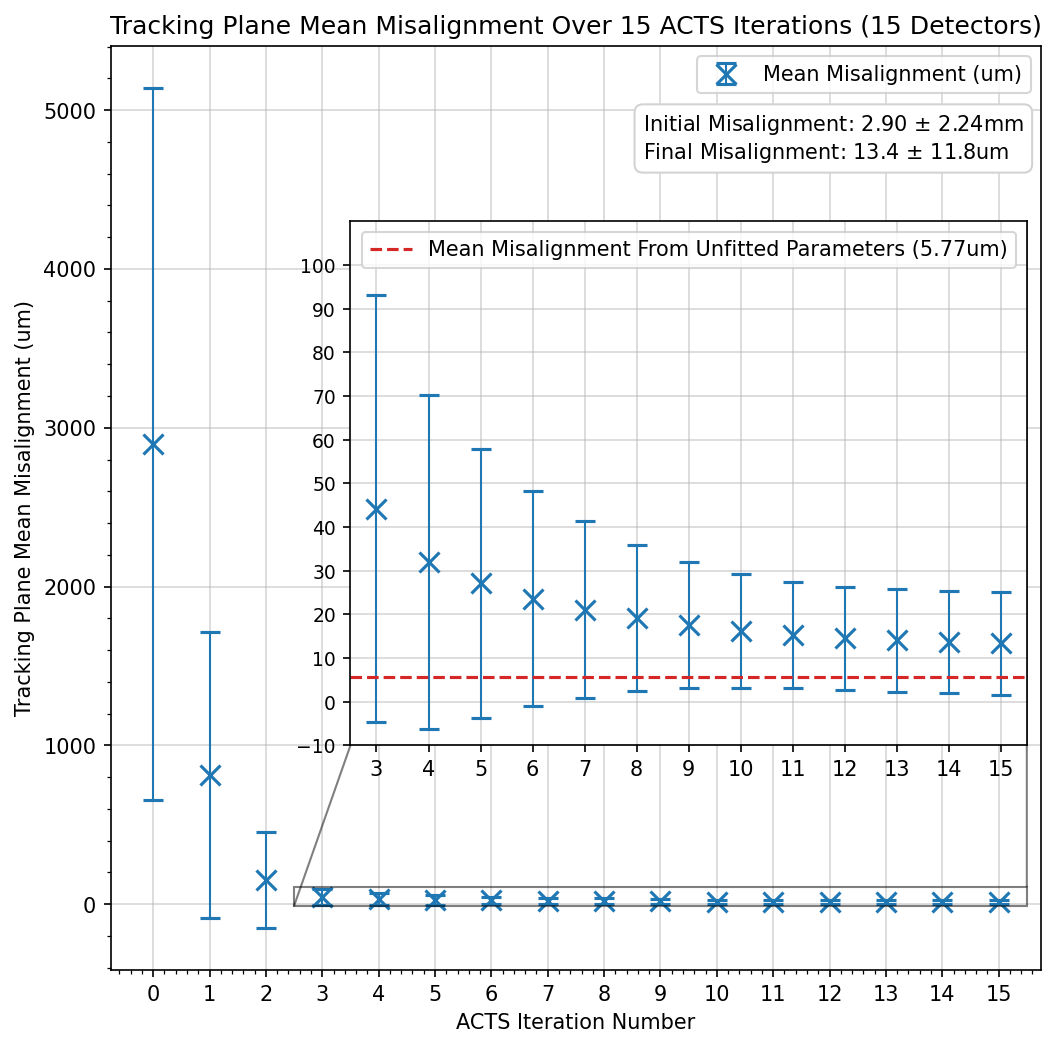

In [974]:
import matplotlib.ticker
from matplotlib.patches import Rectangle

y_misal = y - np.mean(np.abs(aligned_df["LOCAL_Z_HIT_1"]))*x_rot - (-z_rot*np.mean(np.abs(aligned_df["LOCAL_Y_HIT_1"])) + y_rot*np.mean(np.abs(aligned_df["LOCAL_Z_HIT_1"])) + x_t)*np.mean(np.abs(aligned_df["FIT_PY_1"]/aligned_df["FIT_PX_1"]))
z_misal = z + np.mean(np.abs(aligned_df["LOCAL_Y_HIT_1"]))*x_rot - (-z_rot*np.mean(np.abs(aligned_df["LOCAL_Y_HIT_1"])) + y_rot*np.mean(np.abs(aligned_df["LOCAL_Z_HIT_1"])) + x_t)*np.mean(np.abs(aligned_df["FIT_PZ_1"]/aligned_df["FIT_PX_1"]))

residual_y = (-z_rot*np.mean(np.abs(aligned_df["LOCAL_Y_HIT_1"])) + y_rot*np.mean(np.abs(aligned_df["LOCAL_Z_HIT_1"])) + x_t)*np.mean(np.abs(aligned_df["FIT_PY_1"]/aligned_df["FIT_PX_1"]))
residual_z = (-z_rot*np.mean(np.abs(aligned_df["LOCAL_Y_HIT_1"])) + y_rot*np.mean(np.abs(aligned_df["LOCAL_Z_HIT_1"])) + x_t)*np.mean(np.abs(aligned_df["FIT_PZ_1"]/aligned_df["FIT_PX_1"]))
residual = np.mean(np.sqrt(residual_y**2 + residual_z**2), axis = 1)

misal = np.sqrt(y_misal**2+z_misal**2)

fig3, ax3 = plt.subplots(figsize=(8,8), dpi=150)
#ax1.scatter(np.arange(0, n_runs), , lw = 1.5, color="tab:blue", s = 75, marker = "x")
ax3.errorbar(np.arange(0, n_runs), np.mean(misal, axis = 1), yerr = np.std(misal, axis = 1), fmt = "x", capsize = 5, elinewidth=1, markersize = 10, markeredgewidth = 1.5, color = "tab:blue")
plt.minorticks_on()
plt.xticks(np.arange(0, n_runs))
plt.xlabel("ACTS Iteration Number")
ax3.set_ylabel("Tracking Plane Mean Misalignment (um)")
plt.title("Tracking Plane Mean Misalignment Over " + str(n_runs-1) + " ACTS Iterations ("+ str(n_offsets) + " Detectors)")
plt.grid(True, alpha = 0.5)
ax3.legend(["Mean Misalignment (um)"])
    #[r"$\sqrt{\left[ \delta_y - \theta_x \overline{|z|} - \left( \theta_y \overline{|z|} - \theta_z\overline{|y|} + \delta_x \right)\times \frac{p_y}{p_x} \right]^2 + \left[ \delta_z + \theta_x \overline{|y|} - \left( \theta_y \overline{|z|} - \theta_z\overline{|y|} + \delta_x \right) \times \frac{p_z}{p_x} \right]^2}$"])
    #[r"$\sigma_Y = \sigma_Z = 250 \mu \mathrm{m}$, $\sigma_{\theta_x} = 5 \mathrm{mrad}$"]
#ax1.set_yscale("log")
#ax1.set_yticks([5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000])
#ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# Define the area to zoom in on
zoom_area = [2.5, 15.5, -10, 110]  # [xmin, xmax, ymin, ymax]

# Create inset figure
ax_inset = ax3.inset_axes([3.5, 1000, 12, 3300], transform=ax3.transData)  # [left, bottom, width, height]

# Plot zoomed-in portion on the inset figure
ax_inset.errorbar(np.arange(0, n_runs), np.mean(misal, axis = 1), yerr = np.std(misal, axis = 1), fmt = "x", capsize = 5, elinewidth=1, markersize = 10, markeredgewidth = 1.5, color = "tab:blue")
ax_inset.hlines(residual[0], 2.5, 15.5, colors = ["tab:red"], linestyles =["dashed"])
ax_inset.legend(["Mean Misalignment From Unfitted Parameters (5.77um)"])
ax_inset.set_xticks(np.arange(0, n_runs))
ax_inset.tick_params(axis = "y", labelsize = 9)
ax_inset.set_yticks(np.arange(-20, 110, 10))
ax_inset.grid(True, alpha = 0.5)
ax_inset.set_xlim(zoom_area[0], zoom_area[1])
ax_inset.set_ylim(zoom_area[2], zoom_area[3])
rect, connectorlines = ax3.indicate_inset_zoom(ax_inset, alpha = 0.5, edgecolor="black")
connectorlines[0].set(visible=True)
connectorlines[1].set(visible=False)
plt.text(0.572, 0.90, "Initial Misalignment: 2.90 $\pm$ 2.24mm\nFinal Misalignment: 13.4 $\pm$ 11.8um", horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', boxstyle='round,pad=0.4', alpha=1, ec="lightgray"))
plt.savefig("misalignment.jpg")
plt.show()

In [1069]:
np.mean(np.abs(aligned_df["FIT_PY_1"]/aligned_df["FIT_PX_1"]))


0.003330749589171226

In [1066]:
np.mean(np.abs(aligned_df["LOCAL_Y_HIT_1"]))

786.9487149609996

In [558]:
np.mean(misal, axis = 1)

array([2898.1548163 ,  815.71104314,  153.23909507,   44.22986968,
         32.06295337,   27.13920493,   23.60952497,   21.10096213,
         19.17238609,   17.48677096,   16.22336398,   15.26032882,
         14.4984898 ,   14.0262721 ,   13.61845934,   13.37916164])

In [457]:
residual[0]

5.773893054822867

In [559]:
np.std(misal, axis = 1)

array([2240.87769121,  900.36165476,  303.62557697,   48.81809619,
         38.22064393,   30.76683726,   24.6095573 ,   20.19022451,
         16.7887924 ,   14.39879553,   12.99495446,   12.2189291 ,
         11.88235723,   11.69384271,   11.71895791,   11.77562496])

In [366]:
misal[15]

array([32.21174835,  4.88223792, 10.27367357,  5.62913976, 19.03932562,
       34.08492365,  1.03872691,  5.72064633, 12.08868022,  4.61547966,
       35.78419889,  4.3583898 ,  3.64460431,  8.95386985,  5.07141045,
       35.59330034,  4.92923928,  5.94351975,  6.06302944, 10.72603191,
       33.22437532,  7.94566118, 13.10361688,  8.97204429, 18.26837184,
       33.51978972,  5.464317  , 11.68418956,  7.85037013,  8.23258655,
       37.55193373,  3.03090804,  6.73902118,  9.00041017,  3.09398104,
       36.94177424,  4.81668675, 13.08896486, 21.65860686, 14.91349911,
       35.05690038, 11.56859921, 10.3195378 ,  6.82186996, 14.74134324,
       32.68406501,  4.9569518 ,  2.85182123,  4.94584725,  8.79107719,
       33.75697138,  3.44689259,  7.7964077 ,  2.8545243 , 10.58434816,
       36.19177432,  5.15301728, 16.78976729,  9.25432304, 10.25919055,
       38.18385509, 10.94029954,  5.50888207,  5.64473067,  9.7911147 ,
       35.86248183,  5.54076951,  5.80020683,  6.3421485 ,  6.09

In [353]:
np.sum(z_misal, axis = 1)

array([-31812.60981893, -18805.2089478 ,  -5711.15898165,    -66.26674997,
          430.54534083,    495.80417515,    514.30523739,    511.45091705,
          526.80116309,    509.24369838,    511.91703007,    511.51616013,
          511.4364526 ,    509.12167978,    504.28941423,    508.53135357])

In [234]:
aligned_df[aligned_df["P_TRUTH"] > 2500]

,Unnamed: 0,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,...,LOCAL_Z_HIT_4,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
4,4,-0.000338,0.001583,1.570215,2961.872559,1.720796,-1.0,2963.893311,-1.0,2963.889160,...,183.406189,178.702774,178.177078,177.958923,184.027359,183.737045,183.446716,178.511124,178.220734,177.930313
21,21,-0.000343,0.001141,1.571046,2911.429688,-0.725850,-1.0,2819.045654,-1.0,2819.043701,...,-45.365341,-43.181103,-43.144283,-42.981659,-45.617931,-45.493244,-45.368553,-43.248863,-43.124195,-42.999546
54,54,-0.000298,0.001481,1.571548,3354.584229,-2.520701,-1.0,3331.020508,-1.0,3331.015869,...,-244.749542,-238.396301,-238.160767,-237.697281,-245.603241,-245.227493,-244.851746,-238.464111,-238.088379,-237.712631
64,64,-0.000312,0.001094,1.569601,3202.966064,3.827638,-1.0,3198.791748,-1.0,3198.787598,...,311.799500,301.611115,301.042084,300.590332,312.957489,312.360107,311.762756,301.607574,301.010162,300.412720
98,98,-0.000398,0.001765,1.571813,2513.784180,-2.554765,-1.0,2517.299316,-1.0,2517.294189,...,-334.902313,-326.079102,-325.681366,-325.293488,-335.854279,-335.346130,-334.837982,-326.199310,-325.691162,-325.183014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156682,156682,0.000371,-0.002075,1.571026,2697.205566,-0.619067,1.0,2670.281250,1.0,2670.275391,...,-122.527290,-120.628830,-120.414200,-120.324211,-122.738792,-122.624077,-122.509354,-120.559036,-120.444298,-120.329544
156691,156691,0.000342,0.003424,1.569920,2924.414307,2.561861,1.0,2838.168213,1.0,2838.150391,...,462.820312,455.237518,454.837097,454.421600,463.626251,463.188171,462.750061,455.302216,454.864136,454.426086
156696,156696,0.000366,-0.001564,1.570716,2731.957764,0.219711,1.0,2755.223633,1.0,2755.220215,...,272.610291,271.895782,271.846558,271.960419,272.704834,272.664581,272.624359,271.940521,271.900299,271.860077
156701,156701,0.000395,-0.001612,1.571164,2532.760986,-0.930655,1.0,2543.659668,1.0,2543.656250,...,-144.070267,-140.843842,-140.801865,-140.780807,-144.412384,-144.228882,-144.045380,-140.925720,-140.742157,-140.558517


In [60]:
df_2500 = pd.read_csv(input_dir + str(0) + "/df3.csv") 

In [62]:
print(len(df_2500[df_2500["P_TRUTH"] > 3000])/len(df_2500))
print(len(df_2500[df_2500["P_TRUTH"] > 2500])/len(df_2500))
print(len(df_2500[df_2500["P_TRUTH"] > 2000])/len(df_2500))
print(len(df_2500[df_2500["P_TRUTH"] > 1500])/len(df_2500))
print(len(df_2500[df_2500["P_TRUTH"] > 1000])/len(df_2500))
print(len(df_2500[df_2500["P_TRUTH"] > 500])/len(df_2500))
print(len(df_2500[df_2500["P_TRUTH"] > 250])/len(df_2500))
print(len(df_2500[df_2500["P_TRUTH"] > 10])/len(df_2500))

0.017620750769388266
0.061723813606495495
0.12225115648173622
0.20399506055933408
0.29731977759720524
0.4372940566756029
0.5858419762881255
0.9860070508596034


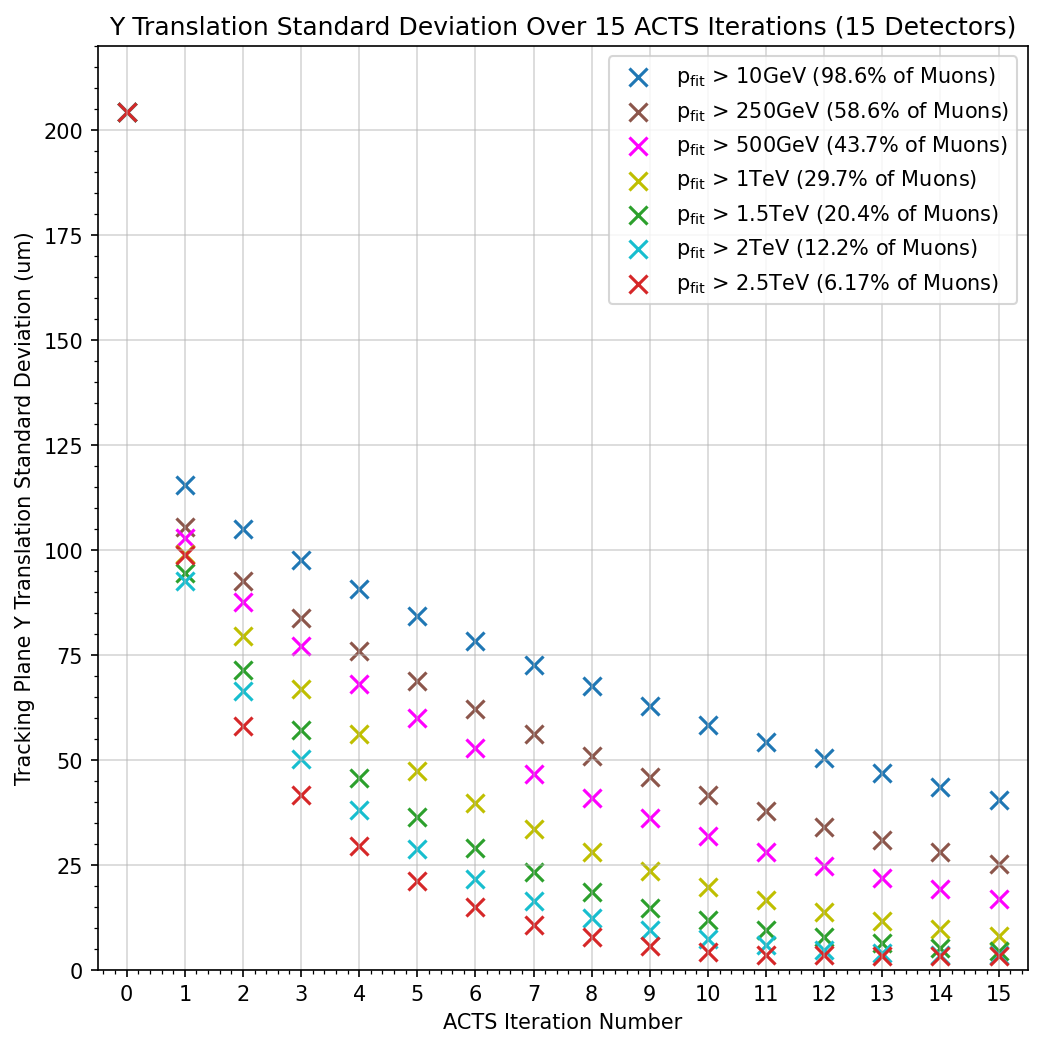

In [1054]:
cut = ["2.5TeV", "2TeV", "1.5TeV", "1TeV", "500GeV", "250GeV", "10GeV"]

cut_y = []

for j in cut:

    input_dir = "E:/MPhys Project Files/YZ " + j + "/output/"
    n_runs = 16
    n_offsets = 15

    y = [np.loadtxt(input_dir + str(0) + "/offsets_y.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]
    for i in range(1, n_runs):
        y = np.concatenate((y, [np.loadtxt(input_dir + str(i) + "/offsets_y.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]), axis = 0)

    cut_y.append(y)

plt.figure(figsize = (8,8), dpi = 150)

x = np.arange(0, n_runs)

plt.ylim(0, 220)
plt.xlim(-0.5, n_runs-0.5)
plt.xticks(np.arange(0,n_runs))
plt.minorticks_on()

plt.xlabel("ACTS Iteration Number")
plt.ylabel("Tracking Plane Y Translation Standard Deviation (um)")
plt.title("Y Translation Standard Deviation Over " + str(n_runs-1) + " ACTS Iterations ("+ str(n_offsets) + " Detectors)")

plt.scatter(x, np.std(cut_y[6], axis = 1), lw = 1.5, color="tab:blue", s = 75, marker = "x")
plt.scatter(x, np.std(cut_y[5], axis = 1), lw = 1.5, color="tab:brown", s = 75, marker = "x")
plt.scatter(x, np.std(cut_y[4], axis = 1), lw = 1.5, color="magenta", s = 75, marker = "x")
plt.scatter(x, np.std(cut_y[3], axis = 1), lw = 1.5, color="y", s = 75, marker = "x")
plt.scatter(x, np.std(cut_y[2], axis = 1), lw = 1.5, color="tab:green", s = 75, marker = "x")
plt.scatter(x, np.std(cut_y[1], axis = 1), lw = 1.5, color="tab:cyan", s = 75, marker = "x")
plt.scatter(x, np.std(cut_y[0], axis = 1), lw = 1.5, color="tab:red", s = 75, marker = "x")

plt.legend(labels = ["$\mathrm{p}_{\mathrm{fit}}$ > 10GeV (98.6% of Muons)", "$\mathrm{p}_{\mathrm{fit}}$ > 250GeV (58.6% of Muons)", "$\mathrm{p}_{\mathrm{fit}}$ > 500GeV (43.7% of Muons)", "$\mathrm{p}_{\mathrm{fit}}$ > 1TeV (29.7% of Muons)", "$\mathrm{p}_{\mathrm{fit}}$ > 1.5TeV (20.4% of Muons)", "$\mathrm{p}_{\mathrm{fit}}$ > 2TeV (12.2% of Muons)", "$\mathrm{p}_{\mathrm{fit}}$ > 2.5TeV (6.17% of Muons)"])
plt.grid(True, alpha = 0.5)

plt.savefig("p_cuts.jpg")

plt.show()

In [562]:
np.sum(aligned_df["Q_TRUTH"])/len(aligned_df)

-0.18443268905578988

In [563]:
aligned_df["PT_FIT"]

0          True
1          True
2          True
3          True
4          True
          ...  
156708    False
156709    False
156710    False
156711    False
156712    False
Name: Q_FIT, Length: 156713, dtype: bool

In [263]:
import uproot
import awkward as ak

def Shift_NaNs(input_array):
    
    nan_mask = np.isnan(input_array)
    output_array = np.array([np.concatenate((row[nan_mask_row], row[~nan_mask_row])) for row, nan_mask_row in zip(input_array, nan_mask)])

    return output_array

def Process_Coords(input_ak_array):
    return Shift_NaNs(ak.to_numpy(ak.pad_none(input_ak_array, target = 6, clip=True)).filled(np.nan))
    
def Generate_DataFrame_From_ROOT(input_dir, i):

    output_path = input_dir + "df" + str(i) + ".csv"
    trackstates_path = input_dir + str(i) + "/trackstates_fitter.root"
    tracksummary_path = input_dir + str(i) + "/tracksummary_fitter.root"

    file = uproot.open(trackstates_path)
    tree_input = file["trackstates"]

    X_TRUTH = Process_Coords(tree_input["t_x"].array())
    GLOBAL_X_HIT = Process_Coords(tree_input["g_x_hit"].array())
    FIT_X_HIT = Process_Coords(tree_input["g_x_smt"].array())

    Y_TRUTH = Process_Coords(tree_input["t_y"].array())
    GLOBAL_Y_HIT = Process_Coords(tree_input["g_y_hit"].array())
    FIT_Y_HIT = Process_Coords(tree_input["g_y_smt"].array())
    LOCAL_Y_HIT = Process_Coords(tree_input["l_y_hit"].array())

    Z_TRUTH = Process_Coords(tree_input["t_z"].array())
    GLOBAL_Z_HIT = Process_Coords(tree_input["g_z_hit"].array())
    FIT_Z_HIT = Process_Coords(tree_input["g_z_smt"].array())
    LOCAL_Z_HIT = Process_Coords(-tree_input["l_x_hit"].array())

    FIT_PX = Process_Coords(tree_input["px_smt"].array())
    FIT_PY = Process_Coords(tree_input["py_smt"].array())
    FIT_PZ = Process_Coords(tree_input["pz_smt"].array())

    file.close()

    file = uproot.open(tracksummary_path)
    tree_input = file["tracksummary"]

    QOP_FIT = ak.to_numpy(ak.flatten(tree_input["eQOP_fit"].array()))
    PHI_FIT = ak.to_numpy(ak.flatten(tree_input["ePHI_fit"].array()))
    THETA_FIT = ak.to_numpy(ak.flatten(tree_input["eTHETA_fit"].array()))

    P_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_p"].array()))
    Q_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_charge"].array()))
    PX_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_px"].array()))
    PY_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_py"].array()))
    PZ_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_pz"].array()))
    PHI_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_phi"].array()))
    THETA_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_theta"].array()))

    CHI2SUM = ak.to_numpy(ak.flatten(tree_input["chi2Sum"].array()))
    NDF = ak.to_numpy(ak.flatten(tree_input["NDF"].array()))

    file.close()

    P_FIT = Q_TRUTH/QOP_FIT
    PZ_FIT = P_FIT*np.cos(THETA_FIT)
    Q_FIT = np.sign(QOP_FIT).astype(int)

    df_columns = [
                "QOP_FIT", "PHI_FIT", "THETA_FIT", "P_FIT", "PZ_FIT", "Q_FIT", 
                "P_TRUTH", "Q_TRUTH", "PX_TRUTH", "PY_TRUTH", "PZ_TRUTH", "PHI_TRUTH", "THETA_TRUTH", 
                "CHI2SUM", "NDF", 
                "FIT_PX_6", "FIT_PX_5", "FIT_PX_4", "FIT_PX_3", "FIT_PX_2", "FIT_PX_1",
                "FIT_PY_6", "FIT_PY_5", "FIT_PY_4", "FIT_PY_3", "FIT_PY_2", "FIT_PY_1",
                "FIT_PZ_6", "FIT_PZ_5", "FIT_PZ_4", "FIT_PZ_3", "FIT_PZ_2", "FIT_PZ_1", 
                "X_TRUTH_6", "X_TRUTH_5", "X_TRUTH_4", "X_TRUTH_3", "X_TRUTH_2", "X_TRUTH_1", 
                "GLOBAL_X_HIT_6", "GLOBAL_X_HIT_5", "GLOBAL_X_HIT_4", "GLOBAL_X_HIT_3", "GLOBAL_X_HIT_2", "GLOBAL_X_HIT_1",
                "FIT_X_HIT_6", "FIT_X_HIT_5", "FIT_X_HIT_4", "FIT_X_HIT_3", "FIT_X_HIT_2", "FIT_X_HIT_1", 
                "Y_TRUTH_6", "Y_TRUTH_5", "Y_TRUTH_4", "Y_TRUTH_3", "Y_TRUTH_2", "Y_TRUTH_1", 
                "GLOBAL_Y_HIT_6", "GLOBAL_Y_HIT_5", "GLOBAL_Y_HIT_4", "GLOBAL_Y_HIT_3", "GLOBAL_Y_HIT_2", "GLOBAL_Y_HIT_1", 
                "LOCAL_Y_HIT_6", "LOCAL_Y_HIT_5", "LOCAL_Y_HIT_4", "LOCAL_Y_HIT_3", "LOCAL_Y_HIT_2", "LOCAL_Y_HIT_1", 
                "FIT_Y_HIT_6", "FIT_Y_HIT_5", "FIT_Y_HIT_4", "FIT_Y_HIT_3", "FIT_Y_HIT_2", "FIT_Y_HIT_1",
                "Z_TRUTH_6", "Z_TRUTH_5", "Z_TRUTH_4", "Z_TRUTH_3", "Z_TRUTH_2", "Z_TRUTH_1", 
                "GLOBAL_Z_HIT_6", "GLOBAL_Z_HIT_5", "GLOBAL_Z_HIT_4", "GLOBAL_Z_HIT_3", "GLOBAL_Z_HIT_2", "GLOBAL_Z_HIT_1",
                "LOCAL_Z_HIT_6", "LOCAL_Z_HIT_5", "LOCAL_Z_HIT_4", "LOCAL_Z_HIT_3", "LOCAL_Z_HIT_2", "LOCAL_Z_HIT_1",
                "FIT_Z_HIT_6", "FIT_Z_HIT_5", "FIT_Z_HIT_4", "FIT_Z_HIT_3", "FIT_Z_HIT_2", "FIT_Z_HIT_1"
    ]

    df_data = [
                QOP_FIT, PHI_FIT, THETA_FIT, P_FIT, PZ_FIT, Q_FIT,
                P_TRUTH, Q_TRUTH, PX_TRUTH, PY_TRUTH, PZ_TRUTH, PHI_TRUTH, THETA_TRUTH, 
                CHI2SUM, NDF, 
                FIT_PX[:,0], FIT_PX[:,1], FIT_PX[:,2], FIT_PX[:,3], FIT_PX[:,4], FIT_PX[:,5], 
                FIT_PY[:,0], FIT_PY[:,1], FIT_PY[:,2], FIT_PY[:,3], FIT_PY[:,4], FIT_PY[:,5], 
                FIT_PZ[:,0], FIT_PZ[:,1], FIT_PZ[:,2], FIT_PZ[:,3], FIT_PZ[:,4], FIT_PZ[:,5], 
                X_TRUTH[:,0], X_TRUTH[:,1], X_TRUTH[:,2], X_TRUTH[:,3], X_TRUTH[:,4], X_TRUTH[:,5], 
                GLOBAL_X_HIT[:,0], GLOBAL_X_HIT[:,1], GLOBAL_X_HIT[:,2], GLOBAL_X_HIT[:,3], GLOBAL_X_HIT[:,4], GLOBAL_X_HIT[:,5], 
                FIT_X_HIT[:,0], FIT_X_HIT[:,1], FIT_X_HIT[:,2], FIT_X_HIT[:,3], FIT_X_HIT[:,4], FIT_X_HIT[:,5],  
                Y_TRUTH[:,0], Y_TRUTH[:,1], Y_TRUTH[:,2], Y_TRUTH[:,3], Y_TRUTH[:,4], Y_TRUTH[:,5], 
                GLOBAL_Y_HIT[:,0], GLOBAL_Y_HIT[:,1], GLOBAL_Y_HIT[:,2], GLOBAL_Y_HIT[:,3], GLOBAL_Y_HIT[:,4], GLOBAL_Y_HIT[:,5],
                LOCAL_Y_HIT[:,0], LOCAL_Y_HIT[:,1], LOCAL_Y_HIT[:,2], LOCAL_Y_HIT[:,3], LOCAL_Y_HIT[:,4], LOCAL_Y_HIT[:,5],
                FIT_Y_HIT[:,0], FIT_Y_HIT[:,1], FIT_Y_HIT[:,2], FIT_Y_HIT[:,3], FIT_Y_HIT[:,4], FIT_Y_HIT[:,5],  
                Z_TRUTH[:,0], Z_TRUTH[:,1], Z_TRUTH[:,2], Z_TRUTH[:,3], Z_TRUTH[:,4], Z_TRUTH[:,5], 
                GLOBAL_Z_HIT[:,0], GLOBAL_Z_HIT[:,1], GLOBAL_Z_HIT[:,2], GLOBAL_Z_HIT[:,3], GLOBAL_Z_HIT[:,4], GLOBAL_Z_HIT[:,5],
                LOCAL_Z_HIT[:,0], LOCAL_Z_HIT[:,1], LOCAL_Z_HIT[:,2], LOCAL_Z_HIT[:,3], LOCAL_Z_HIT[:,4], LOCAL_Z_HIT[:,5],
                FIT_Z_HIT[:,0], FIT_Z_HIT[:,1], FIT_Z_HIT[:,2], FIT_Z_HIT[:,3], FIT_Z_HIT[:,4], FIT_Z_HIT[:,5],  
    ]

    df = pd.DataFrame(data=np.column_stack(df_data), columns=df_columns)
    df.to_csv(output_path)


    return df

In [3]:
df_truth = sim.Generate_DataFrame_From_ROOT(input_dir,0,1)
df_truth

NameError: name 'input_dir' is not defined

In [59]:
i = 0

input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/040224_1_500k@200k/reprop/"
df_reprop = Generate_DataFrame_From_ROOT(input_dir, "")
df_reprop.sort_values(by=["PX_TRUTH"], ignore_index=True, inplace=True)

input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/040224_1_500k@200k/"
df_truth = sim.Generate_DataFrame_From_ROOT(input_dir,0,1)
df_truth.sort_values(by=["FIT_PX_1"], ignore_index=True, inplace=True)

df_truth = df_truth[pd.notna(df_reprop["Y_TRUTH_6"])]
df_reprop = df_reprop[pd.notna(df_reprop["Y_TRUTH_6"])]

df_reprop = df_reprop[(df_truth["P_FIT"] > 10) & (df_truth["CHI2SUM"]/df_truth["NDF"] < 5)]
df_truth = df_truth[(df_truth["P_FIT"] > 10) & (df_truth["CHI2SUM"]/df_truth["NDF"] < 5)]

df_pred = sim.Generate_Predicted_Offset_DataFrame(df_truth)

In [5]:
df_truth = df_truth[np.abs(df_reprop["P_FIT"] - df_reprop["P_TRUTH"])/df_reprop["P_TRUTH"] < 0.01]
df_pred = df_pred[np.abs(df_reprop["P_FIT"] - df_reprop["P_TRUTH"])/df_reprop["P_TRUTH"] < 0.01]
df_reprop = df_reprop[np.abs(df_reprop["P_FIT"] - df_reprop["P_TRUTH"])/df_reprop["P_TRUTH"] < 0.01]

In [67]:
df_pred = df_pred[df_truth["P_TRUTH"] > 500]
df_reprop = df_reprop[df_truth["P_TRUTH"] > 500]
df_truth = df_truth[df_truth["P_TRUTH"] > 500]

In [121]:
my_method2 = (df_pred["HIT_Y_2"] - df_truth["Y_TRUTH_2"])/df_truth["Y_TRUTH_2"]
my_method3 = (df_pred["HIT_Y_3"] - df_truth["Y_TRUTH_3"])/df_truth["Y_TRUTH_3"]
my_method4 = (df_pred["HIT_Y_4"] - df_truth["Y_TRUTH_4"])/df_truth["Y_TRUTH_4"]
my_method5 = (df_pred["HIT_Y_5"] - df_truth["Y_TRUTH_5"])/df_truth["Y_TRUTH_5"]
my_method6 = (df_pred["HIT_Y_6"] - df_truth["Y_TRUTH_6"])/df_truth["Y_TRUTH_6"]
my_method7 = (df_pred["HIT_Z_2"] - df_truth["Z_TRUTH_2"])/df_truth["Z_TRUTH_2"]
my_method8 = (df_pred["HIT_Z_3"] - df_truth["Z_TRUTH_3"])/df_truth["Z_TRUTH_3"]
my_method9 = (df_pred["HIT_Z_4"] - df_truth["Z_TRUTH_4"])/df_truth["Z_TRUTH_4"]
my_method10 = (df_pred["HIT_Z_5"] - df_truth["Z_TRUTH_5"])/df_truth["Z_TRUTH_5"]
my_method11 = (df_pred["HIT_Z_6"] - df_truth["Z_TRUTH_6"])/df_truth["Z_TRUTH_6"]

reprop_method2 = ((df_reprop["Y_TRUTH_2"] - df_truth["Y_TRUTH_2"])/df_truth["Y_TRUTH_2"])
reprop_method3 = ((df_reprop["Y_TRUTH_3"] - df_truth["Y_TRUTH_3"])/df_truth["Y_TRUTH_3"])
reprop_method4 = ((df_reprop["Y_TRUTH_4"] - df_truth["Y_TRUTH_4"])/df_truth["Y_TRUTH_4"])
reprop_method5 = ((df_reprop["Y_TRUTH_5"] - df_truth["Y_TRUTH_5"])/df_truth["Y_TRUTH_5"])
reprop_method6 = ((df_reprop["Y_TRUTH_6"] - df_truth["Y_TRUTH_6"])/df_truth["Y_TRUTH_6"])
reprop_method7 = ((df_reprop["Z_TRUTH_2"] - df_truth["Z_TRUTH_2"])/df_truth["Z_TRUTH_2"])
reprop_method8 = ((df_reprop["Z_TRUTH_3"] - df_truth["Z_TRUTH_3"])/df_truth["Z_TRUTH_3"])
reprop_method9 = ((df_reprop["Z_TRUTH_4"] - df_truth["Z_TRUTH_4"])/df_truth["Z_TRUTH_4"])
reprop_method10 = ((df_reprop["Z_TRUTH_5"] - df_truth["Z_TRUTH_5"])/df_truth["Z_TRUTH_5"])
reprop_method11 = ((df_reprop["Z_TRUTH_6"] - df_truth["Z_TRUTH_6"])/df_truth["Z_TRUTH_6"])

reprop_method = np.array([reprop_method2, reprop_method3, reprop_method4, reprop_method5, reprop_method6, reprop_method7, reprop_method8, reprop_method9, reprop_method10, reprop_method11]).flatten()
my_method = np.array([my_method2, my_method3, my_method4, my_method5, my_method6, my_method7, my_method8, my_method9, my_method10, my_method11]).flatten()

#
#my_method = my_method[np.abs(my_method) < 1]

In [68]:
my_method2 = (df_pred["HIT_Y_2"] - df_truth["Y_TRUTH_2"])
my_method3 = (df_pred["HIT_Y_3"] - df_truth["Y_TRUTH_3"])
my_method4 = (df_pred["HIT_Y_4"] - df_truth["Y_TRUTH_4"])
my_method5 = (df_pred["HIT_Y_5"] - df_truth["Y_TRUTH_5"])
my_method6 = (df_pred["HIT_Y_6"] - df_truth["Y_TRUTH_6"])
my_method7 = (df_pred["HIT_Z_2"] - df_truth["Z_TRUTH_2"])
my_method8 = (df_pred["HIT_Z_3"] - df_truth["Z_TRUTH_3"])
my_method9 = (df_pred["HIT_Z_4"] - df_truth["Z_TRUTH_4"])
my_method10 = (df_pred["HIT_Z_5"] - df_truth["Z_TRUTH_5"])
my_method11 = (df_pred["HIT_Z_6"] - df_truth["Z_TRUTH_6"])

reprop_method2 = ((df_reprop["Y_TRUTH_2"] - df_truth["Y_TRUTH_2"]))
reprop_method3 = ((df_reprop["Y_TRUTH_3"] - df_truth["Y_TRUTH_3"]))
reprop_method4 = ((df_reprop["Y_TRUTH_4"] - df_truth["Y_TRUTH_4"]))
reprop_method5 = ((df_reprop["Y_TRUTH_5"] - df_truth["Y_TRUTH_5"]))
reprop_method6 = ((df_reprop["Y_TRUTH_6"] - df_truth["Y_TRUTH_6"]))
reprop_method7 = ((df_reprop["Z_TRUTH_2"] - df_truth["Z_TRUTH_2"]))
reprop_method8 = ((df_reprop["Z_TRUTH_3"] - df_truth["Z_TRUTH_3"]))
reprop_method9 = ((df_reprop["Z_TRUTH_4"] - df_truth["Z_TRUTH_4"]))
reprop_method10 = ((df_reprop["Z_TRUTH_5"] - df_truth["Z_TRUTH_5"]))
reprop_method11 = ((df_reprop["Z_TRUTH_6"] - df_truth["Z_TRUTH_6"]))

reprop_method = np.array([reprop_method2, reprop_method3, reprop_method4, reprop_method5, reprop_method6, reprop_method7, reprop_method8, reprop_method9, reprop_method10, reprop_method11]).flatten()
my_method = np.array([my_method2, my_method3, my_method4, my_method5, my_method6, my_method7, my_method8, my_method9, my_method10, my_method11]).flatten()

In [39]:
reprop_method = reprop_method[np.abs(reprop_method) < 1]

In [76]:
np.mean(np.abs(my_method))*100

0.1642743407118614

In [77]:
np.mean(my_method)*100

-0.013025349928844063

In [78]:
np.mean(np.abs(reprop_method))*100

1.5639377962710612

In [79]:
np.mean(reprop_method)*100

-1.1049004101519857

In [80]:
np.std((my_method))*100

1.9783567036017162

In [81]:
np.std(np.abs(reprop_method))*100

22.20910198007336

In [548]:
input_dir = "E:/MPhys Project Files/Aligned Detector Mat/output/0/0/"
df_reprop = Generate_DataFrame_From_ROOT(input_dir, "")
df_reprop.sort_values(by=["P_TRUTH"], ignore_index=True, inplace=True)
df_reprop

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,LOCAL_Z_HIT_4,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
0,-0.315065,-0.014015,1.572299,3.173945,-0.004768,-1.0,3.168489,-1.0,3.168171,-0.044668,...,-270.098358,-257.533051,-256.788177,-255.950180,-271.435913,-270.641571,-270.075806,-257.532654,-256.786102,-256.011078
1,-0.301956,0.005924,1.558494,3.311739,0.040741,-1.0,3.301234,-1.0,3.300926,0.019279,...,75.372551,-34.354664,-40.789471,-46.712902,88.828964,81.936134,75.352760,-34.383202,-40.745827,-46.880268
2,-0.301545,-0.008914,1.585519,3.316249,-0.048823,-1.0,3.321548,-1.0,3.321066,-0.029397,...,NaN,-152.474503,-145.207748,-137.833511,NaN,NaN,NaN,-152.478943,-145.200424,-137.868378
3,0.299907,0.022637,1.559940,3.334365,0.036199,1.0,3.331428,1.0,3.330391,0.075259,...,151.467468,146.150009,52.526089,47.359459,NaN,157.147400,151.511200,146.119720,52.548817,47.322594
4,-0.294137,-0.033436,1.562088,3.399771,0.029605,-1.0,3.389592,-1.0,3.387575,-0.113086,...,-238.795685,-315.593872,-319.974915,-324.292297,-229.830994,-234.172897,-238.779312,-315.595734,-319.971069,-324.324158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156615,-0.000245,0.001814,1.570567,4078.162976,0.935184,-1.0,4128.711914,-1.0,4128.705078,7.509590,...,-35.012150,-35.239403,-37.212593,-37.218475,NaN,-34.959892,-35.074562,-35.189232,-37.138596,-37.253265
156616,-0.000263,0.001541,1.570233,3808.135282,2.146634,-1.0,4131.139160,-1.0,4131.133301,6.457872,...,172.215286,167.415100,167.334427,166.738708,172.809540,172.527695,172.245850,167.454590,167.172745,166.887695
156617,-0.000232,0.001582,1.569902,4301.100666,3.846321,-1.0,4232.677734,-1.0,4232.670898,6.673733,...,256.984802,249.439072,248.971939,248.687195,257.845734,257.398590,256.951447,249.350052,248.902908,248.460876
156618,-0.000248,0.001450,1.571209,4024.952832,-1.661284,-1.0,4258.836426,-1.0,4258.831543,6.203004,...,-84.163551,-83.943352,-80.363876,-80.268974,NaN,-84.373825,-84.167435,-83.961044,-80.452446,-80.246056


In [517]:
np.sum(df_reprop["LOCAL_Y_HIT_5"].isna())

24594

In [549]:
input_dir = "E:/MPhys Project Files/Aligned Detector Mat/output/0/"
df_truth = pd.read_csv(input_dir + "df0.csv")
df_truth.sort_values(by=["P_FIT"], ignore_index=True, inplace=True)
df_truth

,Unnamed: 0,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,...,LOCAL_Z_HIT_4,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
0,40009,-0.315608,-0.014098,1.572206,3.168489,-0.004467,-1.0,3.161408,-1.0,3.161091,...,-270.466736,-257.638519,-256.993927,-256.007812,-271.879425,-271.178101,-270.464020,-257.653229,-256.953339,-256.034119
1,7075,-0.302917,0.005840,1.558443,3.301234,0.040780,-1.0,3.313062,-1.0,3.312753,...,75.468933,-34.463886,-40.760807,-46.895081,88.625626,81.967407,75.453300,-34.479073,-40.736526,-46.904125
2,64693,-0.301064,-0.008851,1.585362,3.321548,-0.048380,-1.0,3.322325,-1.0,3.321842,...,-281.444427,-152.455490,-145.271652,-137.879379,-297.177795,-289.365967,-281.457825,-152.468872,-145.243607,-137.893890
3,120592,0.300172,0.022594,1.560205,3.331428,0.035285,1.0,3.330261,1.0,3.329224,...,145.842575,52.465252,47.179604,41.880497,157.117233,151.475937,145.842865,52.466152,47.178062,41.881107
4,35391,-0.295021,-0.033370,1.562065,3.389592,0.029594,-1.0,3.376920,-1.0,3.374912,...,-238.856430,-315.591492,-320.108063,-324.352936,-229.590088,-234.353470,-238.876984,-315.609161,-320.074310,-324.369110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156708,35969,-0.000242,0.001819,1.570569,4128.711914,0.938408,-1.0,3828.009033,-1.0,3828.002686,...,-35.408180,-37.117531,-37.260696,-37.365585,-34.994495,-35.108105,-35.221718,-37.153042,-37.266655,-37.380276
156709,91678,-0.000242,0.001563,1.570229,4131.139160,2.344470,-1.0,4048.756348,-1.0,4048.750732,...,172.223404,167.358398,167.281815,166.893921,172.818771,172.535080,172.251373,167.428329,167.144608,166.860870
156710,45322,-0.000236,0.001577,1.569903,4232.677734,3.779078,-1.0,4016.062256,-1.0,4016.055664,...,257.106110,249.498138,249.023956,248.477402,257.957581,257.511139,257.064667,249.475159,249.028717,248.582306
156711,6096,-0.000235,0.001457,1.571211,4258.836426,-1.766450,-1.0,4230.109375,-1.0,4230.104492,...,-83.856148,-80.492363,-80.164413,-80.022072,-84.359085,-84.151726,-83.944359,-80.419205,-80.211838,-80.004463


In [550]:
df_pred = sim.Generate_Predicted_Offset_DataFrame(df_truth)

In [551]:
df_t = pd.concat([df_truth[["P_FIT", "FIT_PY_1", "Y_TRUTH_1", "Y_TRUTH_2", "Y_TRUTH_3", "Y_TRUTH_4", "Y_TRUTH_5", "Y_TRUTH_6", "Z_TRUTH_1", "Z_TRUTH_2", "Z_TRUTH_3", "Z_TRUTH_4", "Z_TRUTH_5", "Z_TRUTH_6"]], df_pred[["PRED_Y_2", "PRED_Y_3", "PRED_Y_4", "PRED_Y_5", "PRED_Y_6", "PRED_Z_2", "PRED_Z_3", "PRED_Z_4", "PRED_Z_5", "PRED_Z_6"]]], axis = 1)
df_t

,P_FIT,FIT_PY_1,Y_TRUTH_1,Y_TRUTH_2,Y_TRUTH_3,Y_TRUTH_4,Y_TRUTH_5,Y_TRUTH_6,Z_TRUTH_1,Z_TRUTH_2,...,PRED_Y_2,PRED_Y_3,PRED_Y_4,PRED_Y_5,PRED_Y_6,PRED_Z_2,PRED_Z_3,PRED_Z_4,PRED_Z_5,PRED_Z_6
0,3.168489,-0.044668,-1192.195435,-1199.245483,-1206.295654,1083.196167,1279.345459,1475.494629,-256.281006,-256.989532,...,-1199.332083,-1206.381573,1077.161371,1272.795491,1468.429610,-256.712735,-257.417658,-269.944417,-270.701302,-271.458187
1,3.301234,0.019279,-1345.794678,-1342.874756,-1339.954834,1019.595459,1217.373413,1415.151367,-46.942169,-40.766541,...,-1342.880513,-1339.960244,1028.984321,1227.566163,1426.148004,-40.717945,-34.540810,75.439924,82.086302,88.732679
2,3.321548,-0.029397,-1218.413574,-1222.840210,-1227.266846,982.340088,1170.442383,1358.544556,-137.945068,-145.228912,...,-1222.801320,-1227.227151,983.137864,1171.302763,1359.467662,-145.163169,-152.446960,-281.502455,-289.284648,-297.066841
3,3.331428,0.075259,1227.726685,1239.025879,1250.325073,-821.453918,-1000.726257,-1179.998657,41.850094,47.147194,...,1238.983019,1250.281834,-820.702126,-999.901679,-1179.101232,47.177887,52.475278,145.943197,151.569100,157.195004
4,3.389592,-0.113086,-1003.813843,-1020.501404,-1037.188965,898.108093,1068.020752,1237.933472,-324.338379,-319.970764,...,-1020.379218,-1037.070570,889.144665,1058.277323,1227.409982,-319.984840,-315.616745,-238.885438,-234.276770,-229.668103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156708,4128.711914,7.509590,1455.255371,1456.162964,1457.070557,1474.383911,1475.448486,1476.513184,-37.418552,-37.305302,...,1456.143079,1457.052516,1474.255625,1475.310285,1476.364946,-37.251962,-37.138338,-35.206738,-35.093114,-34.979490
156709,4131.139160,6.457872,1325.053223,1325.836670,1326.619995,1341.717529,1342.649292,1343.581055,166.904541,167.187393,...,1325.862421,1326.644031,1341.673068,1342.599817,1343.526566,167.177669,167.461418,172.285144,172.568892,172.852641
156710,4232.677734,6.673733,1341.790161,1342.578369,1343.366577,1358.558838,1359.496338,1360.433838,248.547195,248.993469,...,1342.540313,1343.328672,1358.430667,1359.360683,1360.290700,248.923810,249.370219,256.959168,257.405577,257.851986
156711,4258.836426,6.203004,981.073669,981.801880,982.530151,996.610352,997.480164,998.350037,-79.909767,-80.116302,...,981.847637,982.575889,996.645610,997.514649,998.383688,-80.229447,-80.436822,-83.962197,-84.169572,-84.376947


In [552]:
df_r = df_reprop[["P_TRUTH", "PY_TRUTH", "Y_TRUTH_1", "Y_TRUTH_2", "Y_TRUTH_3", "Y_TRUTH_4", "Y_TRUTH_5", "Y_TRUTH_6", "Z_TRUTH_1", "Z_TRUTH_2", "Z_TRUTH_3", "Z_TRUTH_4", "Z_TRUTH_5", "Z_TRUTH_6"]]
df_r

,P_TRUTH,PY_TRUTH,Y_TRUTH_1,Y_TRUTH_2,Y_TRUTH_3,Y_TRUTH_4,Y_TRUTH_5,Y_TRUTH_6,Z_TRUTH_1,Z_TRUTH_2,Z_TRUTH_3,Z_TRUTH_4,Z_TRUTH_5,Z_TRUTH_6
0,3.168489,-0.044668,-1192.282593,-1199.332031,-1206.381592,1077.032959,1272.657104,1468.281128,-256.007812,-256.712738,-257.417664,-269.944275,-270.701141,-271.458008
1,3.301234,0.019279,-1345.800781,-1342.880493,-1339.960205,1028.916260,1227.497559,1426.078857,-46.895081,-40.717972,-34.540863,75.439217,82.085564,88.731911
2,3.321548,-0.029397,-1218.375488,-1222.801392,-1227.227173,NaN,NaN,NaN,-137.879379,-145.163177,-152.446976,NaN,NaN,NaN
3,3.331428,0.075259,1238.982910,1250.281738,-820.585510,-999.777832,-1178.970215,NaN,47.177895,52.475296,145.943085,151.568970,157.194870,NaN
4,3.389592,-0.113086,-1003.687866,-1020.379272,-1037.070557,888.992065,1058.113159,1227.234253,-324.352936,-319.984833,-315.616760,-238.885986,-234.277359,-229.668732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156615,4128.711914,7.509590,1456.143188,1457.052612,1474.258789,1475.313721,1476.368652,NaN,-37.251942,-37.138298,-35.206341,-35.092697,-34.979053,NaN
156616,4131.139160,6.457872,1325.080811,1325.862427,1326.644043,1341.673828,1342.600586,1343.527344,166.893921,167.177673,167.461426,172.285278,172.569046,172.852798
156617,4232.677734,6.673733,1341.751953,1342.540405,1343.328735,1358.430176,1359.359985,1360.289917,248.477402,248.923828,249.370239,256.959351,257.405762,257.852173
156618,4258.836426,6.203004,981.847656,982.575867,996.647095,997.516296,998.385437,NaN,-80.229462,-80.436844,-83.962418,-84.169807,-84.377197,NaN


In [553]:
df_t["P_FIT"] = df_t["P_FIT"].round(6)
df_t["FIT_PY_1"] = df_t["FIT_PY_1"].round(6)
df_r["P_TRUTH"] = df_r["P_TRUTH"].round(6)
df_r["PY_TRUTH"] = df_r["PY_TRUTH"].round(6)

C:\Users\luke\AppData\Local\Temp\ipykernel_13448\1230022027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r["P_TRUTH"] = df_r["P_TRUTH"].round(6)
C:\Users\luke\AppData\Local\Temp\ipykernel_13448\1230022027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r["PY_TRUTH"] = df_r["PY_TRUTH"].round(6)


In [554]:
merged_df = pd.merge(df_t, df_r, left_on=["P_FIT", "FIT_PY_1"], right_on=["P_TRUTH", "PY_TRUTH"], how="inner")
merged_df

,P_FIT,FIT_PY_1,Y_TRUTH_1_x,Y_TRUTH_2_x,Y_TRUTH_3_x,Y_TRUTH_4_x,Y_TRUTH_5_x,Y_TRUTH_6_x,Z_TRUTH_1_x,Z_TRUTH_2_x,...,Y_TRUTH_3_y,Y_TRUTH_4_y,Y_TRUTH_5_y,Y_TRUTH_6_y,Z_TRUTH_1_y,Z_TRUTH_2_y,Z_TRUTH_3_y,Z_TRUTH_4_y,Z_TRUTH_5_y,Z_TRUTH_6_y
0,3.168489,-0.044668,-1192.195435,-1199.245483,-1206.295654,1083.196167,1279.345459,1475.494629,-256.281006,-256.989532,...,-1206.381592,1077.032959,1272.657104,1468.281128,-256.007812,-256.712738,-257.417664,-269.944275,-270.701141,-271.458008
1,3.301234,0.019279,-1345.794678,-1342.874756,-1339.954834,1019.595459,1217.373413,1415.151367,-46.942169,-40.766541,...,-1339.960205,1028.916260,1227.497559,1426.078857,-46.895081,-40.717972,-34.540863,75.439217,82.085564,88.731911
2,3.321548,-0.029397,-1218.413574,-1222.840210,-1227.266846,982.340088,1170.442383,1358.544556,-137.945068,-145.228912,...,-1227.227173,NaN,NaN,NaN,-137.879379,-145.163177,-152.446976,NaN,NaN,NaN
3,3.331428,0.075259,1227.726685,1239.025879,1250.325073,-821.453918,-1000.726257,-1179.998657,41.850094,47.147194,...,-820.585510,-999.777832,-1178.970215,NaN,47.177895,52.475296,145.943085,151.568970,157.194870,NaN
4,3.389592,-0.113086,-1003.813843,-1020.501404,-1037.188965,898.108093,1068.020752,1237.933472,-324.338379,-319.970764,...,-1037.070557,888.992065,1058.113159,1227.234253,-324.352936,-319.984833,-315.616760,-238.885986,-234.277359,-229.668732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150549,4128.711914,7.509590,1455.255371,1456.162964,1457.070557,1474.383911,1475.448486,1476.513184,-37.418552,-37.305302,...,1474.258789,1475.313721,1476.368652,NaN,-37.251942,-37.138298,-35.206341,-35.092697,-34.979053,NaN
150550,4131.139160,6.457872,1325.053223,1325.836670,1326.619995,1341.717529,1342.649292,1343.581055,166.904541,167.187393,...,1326.644043,1341.673828,1342.600586,1343.527344,166.893921,167.177673,167.461426,172.285278,172.569046,172.852798
150551,4232.677734,6.673733,1341.790161,1342.578369,1343.366577,1358.558838,1359.496338,1360.433838,248.547195,248.993469,...,1343.328735,1358.430176,1359.359985,1360.289917,248.477402,248.923828,249.370239,256.959351,257.405762,257.852173
150552,4258.836426,6.203004,981.073669,981.801880,982.530151,996.610352,997.480164,998.350037,-79.909767,-80.116302,...,996.647095,997.516296,998.385437,NaN,-80.229462,-80.436844,-83.962418,-84.169807,-84.377197,NaN


In [555]:
merged_df.dropna(inplace=True)
merged_df

,P_FIT,FIT_PY_1,Y_TRUTH_1_x,Y_TRUTH_2_x,Y_TRUTH_3_x,Y_TRUTH_4_x,Y_TRUTH_5_x,Y_TRUTH_6_x,Z_TRUTH_1_x,Z_TRUTH_2_x,...,Y_TRUTH_3_y,Y_TRUTH_4_y,Y_TRUTH_5_y,Y_TRUTH_6_y,Z_TRUTH_1_y,Z_TRUTH_2_y,Z_TRUTH_3_y,Z_TRUTH_4_y,Z_TRUTH_5_y,Z_TRUTH_6_y
0,3.168489,-0.044668,-1192.195435,-1199.245483,-1206.295654,1083.196167,1279.345459,1475.494629,-256.281006,-256.989532,...,-1206.381592,1077.032959,1272.657104,1468.281128,-256.007812,-256.712738,-257.417664,-269.944275,-270.701141,-271.458008
1,3.301234,0.019279,-1345.794678,-1342.874756,-1339.954834,1019.595459,1217.373413,1415.151367,-46.942169,-40.766541,...,-1339.960205,1028.916260,1227.497559,1426.078857,-46.895081,-40.717972,-34.540863,75.439217,82.085564,88.731911
4,3.389592,-0.113086,-1003.813843,-1020.501404,-1037.188965,898.108093,1068.020752,1237.933472,-324.338379,-319.970764,...,-1037.070557,888.992065,1058.113159,1227.234253,-324.352936,-319.984833,-315.616760,-238.885986,-234.277359,-229.668732
7,3.418019,0.006059,-1130.103882,-1129.217529,-1128.331177,1115.997314,1304.742920,1493.488403,203.668884,200.559830,...,-1128.329224,1112.056030,1300.465332,1488.874634,203.535034,200.423843,197.312653,142.164398,138.839661,135.514923
8,3.431580,0.172124,560.423096,585.534363,610.645569,-1132.146729,-1289.234985,-1446.323242,-61.008427,-65.147980,...,610.727722,-1129.029297,-1285.857300,-1442.685303,-61.130058,-65.271591,-69.413124,-141.768448,-146.103455,-150.438477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150545,4041.349365,5.486117,1330.883667,1331.561768,1332.239868,1345.575684,1346.404297,1347.233032,32.860443,32.962036,...,1332.423584,1345.745728,1346.573120,1347.400513,32.914696,33.016655,33.118618,34.851971,34.953930,35.055893
150546,4049.646729,4.110396,943.611328,944.118652,944.626038,955.101562,955.763184,956.424805,11.530142,11.557086,...,944.660400,955.068481,955.724426,956.380310,11.513783,11.541238,11.568694,12.035444,12.062901,12.090356
150548,4096.467773,4.014302,1159.337158,1159.826782,1160.316406,1170.461182,1171.102539,1171.743896,-289.806122,-290.262421,...,1160.382446,1170.468994,1171.105347,1171.741699,-289.832062,-290.287811,-290.743591,-298.491486,-298.947235,-299.403015
150550,4131.139160,6.457872,1325.053223,1325.836670,1326.619995,1341.717529,1342.649292,1343.581055,166.904541,167.187393,...,1326.644043,1341.673828,1342.600586,1343.527344,166.893921,167.177673,167.461426,172.285278,172.569046,172.852798


In [583]:
merged_df = merged_df[np.abs(merged_df["PRED_Y_2"] - merged_df["Y_TRUTH_2_y"]) < 5]
merged_df

,P_FIT,FIT_PY_1,Y_TRUTH_1_x,Y_TRUTH_2_x,Y_TRUTH_3_x,Y_TRUTH_4_x,Y_TRUTH_5_x,Y_TRUTH_6_x,Z_TRUTH_1_x,Z_TRUTH_2_x,...,Y_TRUTH_3_y,Y_TRUTH_4_y,Y_TRUTH_5_y,Y_TRUTH_6_y,Z_TRUTH_1_y,Z_TRUTH_2_y,Z_TRUTH_3_y,Z_TRUTH_4_y,Z_TRUTH_5_y,Z_TRUTH_6_y
0,3.168489,-0.044668,-1192.195435,-1199.245483,-1206.295654,1083.196167,1279.345459,1475.494629,-256.281006,-256.989532,...,-1206.381592,1077.032959,1272.657104,1468.281128,-256.007812,-256.712738,-257.417664,-269.944275,-270.701141,-271.458008
1,3.301234,0.019279,-1345.794678,-1342.874756,-1339.954834,1019.595459,1217.373413,1415.151367,-46.942169,-40.766541,...,-1339.960205,1028.916260,1227.497559,1426.078857,-46.895081,-40.717972,-34.540863,75.439217,82.085564,88.731911
4,3.389592,-0.113086,-1003.813843,-1020.501404,-1037.188965,898.108093,1068.020752,1237.933472,-324.338379,-319.970764,...,-1037.070557,888.992065,1058.113159,1227.234253,-324.352936,-319.984833,-315.616760,-238.885986,-234.277359,-229.668732
7,3.418019,0.006059,-1130.103882,-1129.217529,-1128.331177,1115.997314,1304.742920,1493.488403,203.668884,200.559830,...,-1128.329224,1112.056030,1300.465332,1488.874634,203.535034,200.423843,197.312653,142.164398,138.839661,135.514923
8,3.431580,0.172124,560.423096,585.534363,610.645569,-1132.146729,-1289.234985,-1446.323242,-61.008427,-65.147980,...,610.727722,-1129.029297,-1285.857300,-1442.685303,-61.130058,-65.271591,-69.413124,-141.768448,-146.103455,-150.438477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150545,4041.349365,5.486117,1330.883667,1331.561768,1332.239868,1345.575684,1346.404297,1347.233032,32.860443,32.962036,...,1332.423584,1345.745728,1346.573120,1347.400513,32.914696,33.016655,33.118618,34.851971,34.953930,35.055893
150546,4049.646729,4.110396,943.611328,944.118652,944.626038,955.101562,955.763184,956.424805,11.530142,11.557086,...,944.660400,955.068481,955.724426,956.380310,11.513783,11.541238,11.568694,12.035444,12.062901,12.090356
150548,4096.467773,4.014302,1159.337158,1159.826782,1160.316406,1170.461182,1171.102539,1171.743896,-289.806122,-290.262421,...,1160.382446,1170.468994,1171.105347,1171.741699,-289.832062,-290.287811,-290.743591,-298.491486,-298.947235,-299.403015
150550,4131.139160,6.457872,1325.053223,1325.836670,1326.619995,1341.717529,1342.649292,1343.581055,166.904541,167.187393,...,1326.644043,1341.673828,1342.600586,1343.527344,166.893921,167.177673,167.461426,172.285278,172.569046,172.852798


In [557]:
merged_df[merged_df.duplicated(subset=["P_FIT", "FIT_PY_1"], keep=False)]

,P_FIT,FIT_PY_1,Y_TRUTH_1_x,Y_TRUTH_2_x,Y_TRUTH_3_x,Y_TRUTH_4_x,Y_TRUTH_5_x,Y_TRUTH_6_x,Z_TRUTH_1_x,Z_TRUTH_2_x,...,Y_TRUTH_3_y,Y_TRUTH_4_y,Y_TRUTH_5_y,Y_TRUTH_6_y,Z_TRUTH_1_y,Z_TRUTH_2_y,Z_TRUTH_3_y,Z_TRUTH_4_y,Z_TRUTH_5_y,Z_TRUTH_6_y


In [577]:
my_method2 = (merged_df["PRED_Y_2"] - merged_df["Y_TRUTH_2_x"])/merged_df["Y_TRUTH_2_x"]
my_method3 = (merged_df["PRED_Y_3"] - merged_df["Y_TRUTH_3_x"])/merged_df["Y_TRUTH_3_x"]
my_method4 = (merged_df["PRED_Y_4"] - merged_df["Y_TRUTH_4_x"])/merged_df["Y_TRUTH_4_x"]
my_method5 = (merged_df["PRED_Y_5"] - merged_df["Y_TRUTH_5_x"])/merged_df["Y_TRUTH_5_x"]
my_method6 = (merged_df["PRED_Y_6"] - merged_df["Y_TRUTH_6_x"])/merged_df["Y_TRUTH_6_x"]
my_method7 = (merged_df["PRED_Z_2"] - merged_df["Z_TRUTH_2_x"])/merged_df["Z_TRUTH_2_x"]
my_method8 = (merged_df["PRED_Z_3"] - merged_df["Z_TRUTH_3_x"])/merged_df["Z_TRUTH_3_x"]
my_method9 = (merged_df["PRED_Z_4"] - merged_df["Z_TRUTH_4_x"])/merged_df["Z_TRUTH_4_x"]
my_method10 = (merged_df["PRED_Z_5"] - merged_df["Z_TRUTH_5_x"])/merged_df["Z_TRUTH_5_x"]
my_method11 = (merged_df["PRED_Z_6"] - merged_df["Z_TRUTH_6_x"])/merged_df["Z_TRUTH_6_x"]

reprop_method2 = (merged_df["Y_TRUTH_2_y"] - merged_df["Y_TRUTH_2_x"])/merged_df["Y_TRUTH_2_x"]
reprop_method3 = (merged_df["Y_TRUTH_3_y"] - merged_df["Y_TRUTH_3_x"])/merged_df["Y_TRUTH_3_x"]
reprop_method4 = (merged_df["Y_TRUTH_4_y"] - merged_df["Y_TRUTH_4_x"])/merged_df["Y_TRUTH_4_x"]
reprop_method5 = (merged_df["Y_TRUTH_5_y"] - merged_df["Y_TRUTH_5_x"])/merged_df["Y_TRUTH_5_x"]
reprop_method6 = (merged_df["Y_TRUTH_6_y"] - merged_df["Y_TRUTH_6_x"])/merged_df["Y_TRUTH_6_x"]
reprop_method7 = (merged_df["Z_TRUTH_2_y"] - merged_df["Z_TRUTH_2_x"])/merged_df["Z_TRUTH_2_x"]
reprop_method8 = (merged_df["Z_TRUTH_3_y"] - merged_df["Z_TRUTH_3_x"])/merged_df["Z_TRUTH_3_x"]
reprop_method9 = (merged_df["Z_TRUTH_4_y"] - merged_df["Z_TRUTH_4_x"])/merged_df["Z_TRUTH_4_x"]
reprop_method10 = (merged_df["Z_TRUTH_5_y"] - merged_df["Z_TRUTH_5_x"])/merged_df["Z_TRUTH_5_x"]
reprop_method11 = (merged_df["Z_TRUTH_6_y"] - merged_df["Z_TRUTH_6_x"])/merged_df["Z_TRUTH_6_x"]

reprop_method = np.array([reprop_method2, reprop_method3, reprop_method4, reprop_method5, reprop_method6, reprop_method7, reprop_method8, reprop_method9, reprop_method10, reprop_method11]).flatten()
my_method = np.array([my_method2, my_method3, my_method4, my_method5, my_method6, my_method7, my_method8, my_method9, my_method10, my_method11]).flatten()

In [586]:
my_method2 = (merged_df["PRED_Y_2"] - merged_df["Y_TRUTH_2_x"])
my_method3 = (merged_df["PRED_Y_3"] - merged_df["Y_TRUTH_3_x"])
my_method4 = (merged_df["PRED_Y_4"] - merged_df["Y_TRUTH_4_x"])
my_method5 = (merged_df["PRED_Y_5"] - merged_df["Y_TRUTH_5_x"])
my_method6 = (merged_df["PRED_Y_6"] - merged_df["Y_TRUTH_6_x"])
my_method7 = (merged_df["PRED_Z_2"] - merged_df["Z_TRUTH_2_x"])
my_method8 = (merged_df["PRED_Z_3"] - merged_df["Z_TRUTH_3_x"])
my_method9 = (merged_df["PRED_Z_4"] - merged_df["Z_TRUTH_4_x"])
my_method10 = (merged_df["PRED_Z_5"] - merged_df["Z_TRUTH_5_x"])
my_method11 = (merged_df["PRED_Z_6"] - merged_df["Z_TRUTH_6_x"])

reprop_method2 = (merged_df["Y_TRUTH_2_y"] - merged_df["Y_TRUTH_2_x"])
reprop_method3 = (merged_df["Y_TRUTH_3_y"] - merged_df["Y_TRUTH_3_x"])
reprop_method4 = (merged_df["Y_TRUTH_4_y"] - merged_df["Y_TRUTH_4_x"])
reprop_method5 = (merged_df["Y_TRUTH_5_y"] - merged_df["Y_TRUTH_5_x"])
reprop_method6 = (merged_df["Y_TRUTH_6_y"] - merged_df["Y_TRUTH_6_x"])
reprop_method7 = (merged_df["Z_TRUTH_2_y"] - merged_df["Z_TRUTH_2_x"])
reprop_method8 = (merged_df["Z_TRUTH_3_y"] - merged_df["Z_TRUTH_3_x"])
reprop_method9 = (merged_df["Z_TRUTH_4_y"] - merged_df["Z_TRUTH_4_x"])
reprop_method10 = (merged_df["Z_TRUTH_5_y"] - merged_df["Z_TRUTH_5_x"])
reprop_method11 = (merged_df["Z_TRUTH_6_y"] - merged_df["Z_TRUTH_6_x"])

reprop_method = np.array([reprop_method2, reprop_method3, reprop_method4, reprop_method5, reprop_method6, reprop_method7, reprop_method8, reprop_method9, reprop_method10, reprop_method11]).flatten()
my_method = np.array([my_method2, my_method3, my_method4, my_method5, my_method6, my_method7, my_method8, my_method9, my_method10, my_method11]).flatten()

In [591]:
my_method2 = np.sqrt((merged_df["PRED_Y_2"] - merged_df["Y_TRUTH_2_x"])**2 + (merged_df["PRED_Z_2"] - merged_df["Z_TRUTH_2_x"])**2)
my_method3 = np.sqrt((merged_df["PRED_Y_3"] - merged_df["Y_TRUTH_3_x"])**2 + (merged_df["PRED_Z_3"] - merged_df["Z_TRUTH_3_x"])**2)
my_method4 = np.sqrt((merged_df["PRED_Y_4"] - merged_df["Y_TRUTH_4_x"])**2 + (merged_df["PRED_Z_4"] - merged_df["Z_TRUTH_4_x"])**2)
my_method5 = np.sqrt((merged_df["PRED_Y_5"] - merged_df["Y_TRUTH_5_x"])**2 + (merged_df["PRED_Z_5"] - merged_df["Z_TRUTH_5_x"])**2)
my_method6 = np.sqrt((merged_df["PRED_Y_6"] - merged_df["Y_TRUTH_6_x"])**2 + (merged_df["PRED_Z_6"] - merged_df["Z_TRUTH_6_x"])**2)

reprop_method2 = np.sqrt((merged_df["Y_TRUTH_2_y"] - merged_df["Y_TRUTH_2_x"])**2 + (merged_df["Z_TRUTH_2_y"] - merged_df["Z_TRUTH_2_x"])**2)
reprop_method3 = np.sqrt((merged_df["Y_TRUTH_3_y"] - merged_df["Y_TRUTH_3_x"])**2 + (merged_df["Z_TRUTH_3_y"] - merged_df["Z_TRUTH_3_x"])**2)
reprop_method4 = np.sqrt((merged_df["Y_TRUTH_4_y"] - merged_df["Y_TRUTH_4_x"])**2 + (merged_df["Z_TRUTH_4_y"] - merged_df["Z_TRUTH_4_x"])**2)
reprop_method5 = np.sqrt((merged_df["Y_TRUTH_5_y"] - merged_df["Y_TRUTH_5_x"])**2 + (merged_df["Z_TRUTH_5_y"] - merged_df["Z_TRUTH_5_x"])**2)
reprop_method6 = np.sqrt((merged_df["Y_TRUTH_6_y"] - merged_df["Y_TRUTH_6_x"])**2 + (merged_df["Z_TRUTH_6_y"] - merged_df["Z_TRUTH_6_x"])**2)

reprop_method = np.array([reprop_method2, reprop_method3, reprop_method4, reprop_method5, reprop_method6]).flatten()
my_method = np.array([my_method2, my_method3, my_method4, my_method5, my_method6]).flatten()

In [594]:
print(np.mean(np.abs(my_method))*1000)
print(np.std(np.abs(my_method))*1000)

190.94409662958375
283.91712250601535


In [595]:
print(np.mean(np.abs(reprop_method))*1000)
print(np.std(np.abs(reprop_method))*1000)

190.77505890331378
284.16873084587047


In [596]:
print(np.mean(my_method)*1000)
print(np.std(my_method)*1000)

190.94409662958375
283.91712250601535


In [597]:
print(np.mean(reprop_method)*1000)
print(np.std(reprop_method)*1000)

190.77505890331378
284.16873084587047


<function matplotlib.pyplot.show(close=None, block=None)>

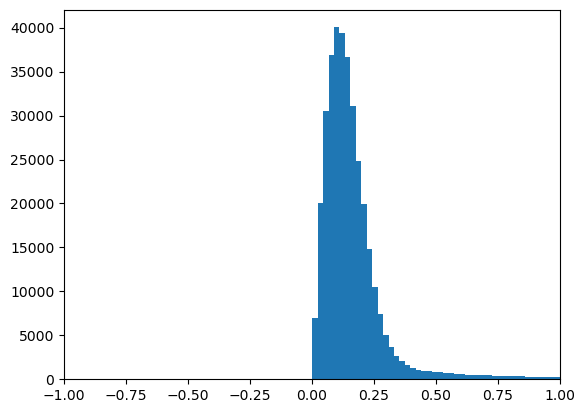

In [598]:
plt.hist(my_method, bins = 500)
plt.xlim(-1, 1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

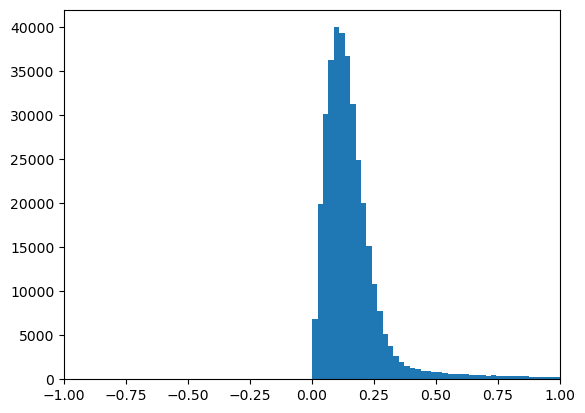

In [599]:
plt.hist(reprop_method, bins = 500)
plt.xlim(-1, 1)
plt.show

In [569]:
merged_df[reprop_method9 == 0]

,P_FIT,FIT_PY_1,Y_TRUTH_1_x,Y_TRUTH_2_x,Y_TRUTH_3_x,Y_TRUTH_4_x,Y_TRUTH_5_x,Y_TRUTH_6_x,Z_TRUTH_1_x,Z_TRUTH_2_x,...,Y_TRUTH_3_y,Y_TRUTH_4_y,Y_TRUTH_5_y,Y_TRUTH_6_y,Z_TRUTH_1_y,Z_TRUTH_2_y,Z_TRUTH_3_y,Z_TRUTH_4_y,Z_TRUTH_5_y,Z_TRUTH_6_y
17832,39.131073,0.005586,393.466461,393.539154,393.611816,210.943192,195.688034,180.432877,5.074667,11.799347,...,393.540558,210.851791,195.595444,180.339096,5.068960,11.793941,18.518921,132.876923,139.605042,146.333145
23147,51.720333,-0.072253,395.673920,394.974365,394.274841,521.775452,532.690674,543.605896,-452.287964,-449.609955,...,394.233765,521.549622,532.449036,543.348389,-452.290619,-449.612457,-446.934296,-401.398895,-398.720093,-396.041290
61030,226.005920,-0.320228,881.410522,880.718567,880.026550,899.717407,901.646912,903.576416,-285.843018,-285.645782,...,880.033691,899.824097,901.768005,903.711853,-285.998840,-285.793427,-285.587982,-282.095551,-281.890137,-281.684692
84536,464.599091,0.746736,679.184265,679.988892,680.793579,709.866699,711.954651,714.042542,102.742355,102.978432,...,680.674194,709.806580,711.899231,713.991882,102.745796,102.981689,103.217583,107.227798,107.463692,107.699585


In [ ]:
i = 0

input_dir = "E:/MPhys Project Files/Aligned Detector No Mat/output/0/"
df_reprop = Generate_DataFrame_From_ROOT(input_dir, "")
df_reprop.sort_values(by=["PX_TRUTH"], ignore_index=True, inplace=True)

input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/040224_1_500k@200k/"
df_truth = sim.Generate_DataFrame_From_ROOT(input_dir,0,1)
df_truth.sort_values(by=["FIT_PX_1"], ignore_index=True, inplace=True)

df_truth = df_truth[pd.notna(df_reprop["Y_TRUTH_6"])]
df_reprop = df_reprop[pd.notna(df_reprop["Y_TRUTH_6"])]

df_reprop = df_reprop[(df_truth["P_FIT"] > 10) & (df_truth["CHI2SUM"]/df_truth["NDF"] < 5)]
df_truth = df_truth[(df_truth["P_FIT"] > 10) & (df_truth["CHI2SUM"]/df_truth["NDF"] < 5)]

df_pred = sim.Generate_Predicted_Offset_DataFrame(df_truth)

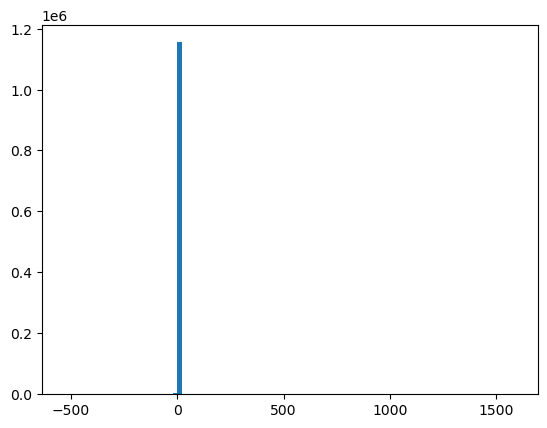

In [146]:
plt.hist(reprop_method, bins = 100)
plt.show()

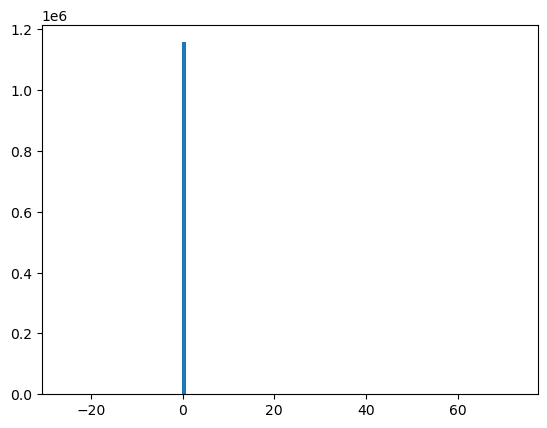

In [147]:
plt.hist(my_method, bins = 100)
plt.show()

In [53]:
aligned_low_df = pd.read_csv("E:/MPhys Project Files/Low Res Aligned/output/0/df0.csv")

al_bins = np.arange(0, 5500, step = 500)

al_p_s_res_l = []
al_p_m_res_l = []
al_binned_p_res_l = []

df_i = aligned_low_df
df_i = df_i[df_i["P_TRUTH"] < 3000]
for k in range(1, len(al_bins)):
    
    al_binned_p_res_l.append(np.std((np.abs((((df_i["P_FIT"] - df_i["P_TRUTH"])/df_i["P_TRUTH"])[(df_i["P_TRUTH"] > al_bins[k-1]) & (df_i["P_TRUTH"] < al_bins[k])])))*100))

al_p_s_res_l.append(np.std(np.abs((df_i["P_FIT"] - df_i["P_TRUTH"])/df_i["P_TRUTH"])*100))
al_p_m_res_l.append(np.mean(np.abs((df_i["P_FIT"] - df_i["P_TRUTH"])/df_i["P_TRUTH"])*100))

In [52]:
al_bins = np.arange(0, 5500, step = 500)

misal_p_s_res_l = []
misal_p_m_res_l = []
misal_binned_p_res_l = []

df_i = pd.read_csv("E:/MPhys Project Files/Low Res Misaligned/output/0/df0.csv")

for j in range(1, n_offsets):

    df_i = pd.concat([df_i, pd.read_csv("E:/MPhys Project Files/Low Res Misaligned/output/0/df" + str(j) + ".csv")], ignore_index = True)
    df_i = df_i[df_i["P_TRUTH"] < 3000]
    for k in range(1, len(al_bins)):
        
        misal_binned_p_res_l.append(np.std((np.abs((((df_i["P_FIT"] - df_i["P_TRUTH"])/df_i["P_TRUTH"])[(df_i["P_TRUTH"] > al_bins[k-1]) & (df_i["P_TRUTH"] < al_bins[k])])))*100))

misal_p_s_res_l.append(np.std(np.abs((df_i["P_FIT"] - df_i["P_TRUTH"])/df_i["P_TRUTH"])*100))
misal_p_m_res_l.append(np.mean(np.abs((df_i["P_FIT"] - df_i["P_TRUTH"])/df_i["P_TRUTH"])*100))

In [54]:
al_p_s_res_l

[0.43413918240670546]

In [55]:
misal_p_s_res_l

[0.6030583065928103]

In [56]:
misal_p_m_res_l

[0.49688617443922434]

In [57]:
al_p_m_res_l

[0.1598433722733779]

In [838]:
sim.Propagate_B_Field(np.array([91.9]),np.array([1]),np.array([1]),1,1,4000)

(array([91.87912522]),
 array([2.19916983]),
 array([1]),
 4000.0,
 array([69.63075546]),
 array([43.5298974]))